
    
   ### Flight Price Prediction
   
   #### Problem Statement:
    
    Flight ticket prices can be something hard to guess, today we might see a price, check out the price of the same flight tomorrow, it will be a different story. We might have often heard travellers saying that flight ticket prices are so unpredictable. Here you will be provided with prices of flight tickets for various airlines between the months of March and June of 2019 and between various cities.

    Size of training set: 10683 records

    Size of test set: 2671 records

   #### FEATURES:
   
    Airline: The name of the airline.

    Date_of_Journey: The date of the journey

    Source: The source from which the service begins.

    Destination: The destination where the service ends.

    Route: The route taken by the flight to reach the destination.

    Dep_Time: The time when the journey starts from the source.

    Arrival_Time: Time of arrival at the destination.

    Duration: Total duration of the flight.

    Total_Stops: Total stops between the source and destination.

    Additional_Info: Additional information about the flight

    Price: The price of the ticket



    You have to use your skills as a data scientist and build a machine learning model to predict the price of the flight ticket. 



### DATA PREPARATION:
     - loading Data
     - analyze the data and its dtypes
     - check for missing values.
     - check for realistic irregularities.
     - Feature engineering if required

In [1]:
#IMPORTS

import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sb
%matplotlib inline

plt.style.use('fivethirtyeight')
import warnings
warnings.filterwarnings('ignore')

from sklearn.multioutput import MultiOutputRegressor
from sklearn.model_selection import train_test_split,GridSearchCV,RandomizedSearchCV,cross_val_score
from sklearn.linear_model import LinearRegression, Ridge , Lasso
from sklearn.tree import DecisionTreeRegressor
from sklearn.svm import SVR, LinearSVR
from sklearn.ensemble import RandomForestRegressor, AdaBoostRegressor, GradientBoostingRegressor
from sklearn.neighbors import KNeighborsRegressor
from xgboost import XGBRegressor
from lightgbm import LGBMRegressor


from sklearn.metrics import r2_score,mean_absolute_error,mean_squared_error

In [2]:
data_train = pd.read_excel('FL_Data_Train.xlsx')
data_test = pd.read_excel('FL_Test_set.xlsx')

In [3]:
data_train

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
0,IndiGo,24/03/2019,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897
1,Air India,1/05/2019,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,No info,7662
2,Jet Airways,9/06/2019,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25 10 Jun,19h,2 stops,No info,13882
3,IndiGo,12/05/2019,Kolkata,Banglore,CCU → NAG → BLR,18:05,23:30,5h 25m,1 stop,No info,6218
4,IndiGo,01/03/2019,Banglore,New Delhi,BLR → NAG → DEL,16:50,21:35,4h 45m,1 stop,No info,13302
...,...,...,...,...,...,...,...,...,...,...,...
10678,Air Asia,9/04/2019,Kolkata,Banglore,CCU → BLR,19:55,22:25,2h 30m,non-stop,No info,4107
10679,Air India,27/04/2019,Kolkata,Banglore,CCU → BLR,20:45,23:20,2h 35m,non-stop,No info,4145
10680,Jet Airways,27/04/2019,Banglore,Delhi,BLR → DEL,08:20,11:20,3h,non-stop,No info,7229
10681,Vistara,01/03/2019,Banglore,New Delhi,BLR → DEL,11:30,14:10,2h 40m,non-stop,No info,12648


In [4]:
data_test

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info
0,Jet Airways,6/06/2019,Delhi,Cochin,DEL → BOM → COK,17:30,04:25 07 Jun,10h 55m,1 stop,No info
1,IndiGo,12/05/2019,Kolkata,Banglore,CCU → MAA → BLR,06:20,10:20,4h,1 stop,No info
2,Jet Airways,21/05/2019,Delhi,Cochin,DEL → BOM → COK,19:15,19:00 22 May,23h 45m,1 stop,In-flight meal not included
3,Multiple carriers,21/05/2019,Delhi,Cochin,DEL → BOM → COK,08:00,21:00,13h,1 stop,No info
4,Air Asia,24/06/2019,Banglore,Delhi,BLR → DEL,23:55,02:45 25 Jun,2h 50m,non-stop,No info
...,...,...,...,...,...,...,...,...,...,...
2666,Air India,6/06/2019,Kolkata,Banglore,CCU → DEL → BLR,20:30,20:25 07 Jun,23h 55m,1 stop,No info
2667,IndiGo,27/03/2019,Kolkata,Banglore,CCU → BLR,14:20,16:55,2h 35m,non-stop,No info
2668,Jet Airways,6/03/2019,Delhi,Cochin,DEL → BOM → COK,21:50,04:25 07 Mar,6h 35m,1 stop,No info
2669,Air India,6/03/2019,Delhi,Cochin,DEL → BOM → COK,04:00,19:15,15h 15m,1 stop,No info


#### OBSERVATIONS:
    - ALL THE Features are Categorical Features.
    - some Features are Date Time OBject , from which we can extract data .
    

In [5]:
for i in data_train.columns:
    print('-------------',i,'--------------')
    print(data_train[i].value_counts())

------------- Airline --------------
Jet Airways                          3849
IndiGo                               2053
Air India                            1752
Multiple carriers                    1196
SpiceJet                              818
Vistara                               479
Air Asia                              319
GoAir                                 194
Multiple carriers Premium economy      13
Jet Airways Business                    6
Vistara Premium economy                 3
Trujet                                  1
Name: Airline, dtype: int64
------------- Date_of_Journey --------------
18/05/2019    504
6/06/2019     503
21/05/2019    497
9/06/2019     495
12/06/2019    493
9/05/2019     484
21/03/2019    423
15/05/2019    405
27/05/2019    382
27/06/2019    355
24/06/2019    351
1/06/2019     342
3/06/2019     333
15/06/2019    328
24/03/2019    323
6/03/2019     308
27/03/2019    299
24/05/2019    286
6/05/2019     282
1/05/2019     277
12/05/2019    259
1/04/201

##### OBSERVATIONS:
    - Date of journey , is a date object
    - Arrival Time Feature have some row values with Date and month we can remove it as date of the arrival
    -

### Null values for Route and Total Stops

In [6]:
data_train[data_train.isna().any(axis=1)]

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
9039,Air India,6/05/2019,Delhi,Cochin,NaN,09:45,09:25 07 May,23h 40m,NaN,No info,7480


### AS NULL VALUES ARE IN  ROW DATA  we can dropp null values

In [7]:
data_train.shape

(10683, 11)

In [8]:
data_train = data_train.dropna()

In [9]:
data_train.shape

(10682, 11)

### EDA:

In [10]:
data_train['Airline'].value_counts()

Jet Airways                          3849
IndiGo                               2053
Air India                            1751
Multiple carriers                    1196
SpiceJet                              818
Vistara                               479
Air Asia                              319
GoAir                                 194
Multiple carriers Premium economy      13
Jet Airways Business                    6
Vistara Premium economy                 3
Trujet                                  1
Name: Airline, dtype: int64

In [11]:
def count_percentage(feature):
    counts  = data_train[feature].value_counts() / len(data_train)*100
    return(counts)

In [12]:
count = count_percentage('Airline')
count

Jet Airways                          36.032578
IndiGo                               19.219247
Air India                            16.392061
Multiple carriers                    11.196405
SpiceJet                              7.657742
Vistara                               4.484179
Air Asia                              2.986332
GoAir                                 1.816139
Multiple carriers Premium economy     0.121700
Jet Airways Business                  0.056169
Vistara Premium economy               0.028085
Trujet                                0.009362
Name: Airline, dtype: float64

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11]),
 [Text(0, 0, 'IndiGo'),
  Text(1, 0, 'Air India'),
  Text(2, 0, 'Jet Airways'),
  Text(3, 0, 'SpiceJet'),
  Text(4, 0, 'Multiple carriers'),
  Text(5, 0, 'GoAir'),
  Text(6, 0, 'Vistara'),
  Text(7, 0, 'Air Asia'),
  Text(8, 0, 'Vistara Premium economy'),
  Text(9, 0, 'Jet Airways Business'),
  Text(10, 0, 'Multiple carriers Premium economy'),
  Text(11, 0, 'Trujet')])

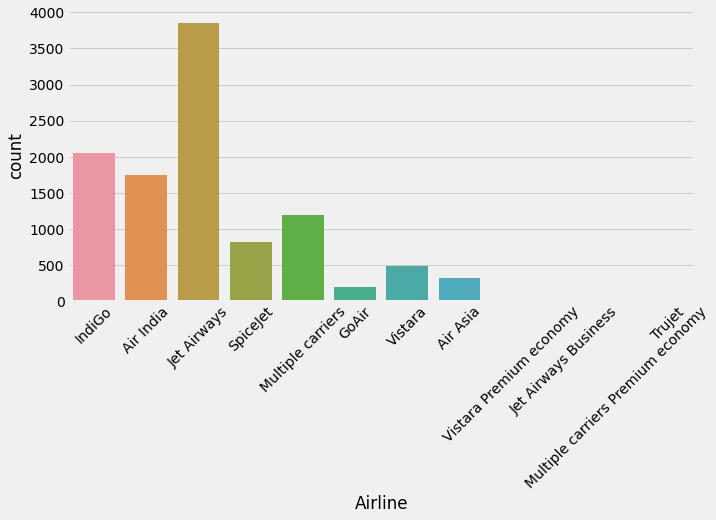

In [13]:

plt.figure(figsize=(10,5))

sb.countplot(data_train['Airline'])

plt.xticks(rotation=45)


#### OBSERVATIONS:
    - Jet airways has highest  count of data and comprises of 39% of total Data.
    - Multiple carriers Premium economy ,Jet Airways Business  ,Vistara Premium economy, trujet has lowest count of data with 0.05% - 0.02% Data rows. 

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11]),
 [Text(0, 0, 'IndiGo'),
  Text(1, 0, 'Air India'),
  Text(2, 0, 'Jet Airways'),
  Text(3, 0, 'SpiceJet'),
  Text(4, 0, 'Multiple carriers'),
  Text(5, 0, 'GoAir'),
  Text(6, 0, 'Vistara'),
  Text(7, 0, 'Air Asia'),
  Text(8, 0, 'Vistara Premium economy'),
  Text(9, 0, 'Jet Airways Business'),
  Text(10, 0, 'Multiple carriers Premium economy'),
  Text(11, 0, 'Trujet')])

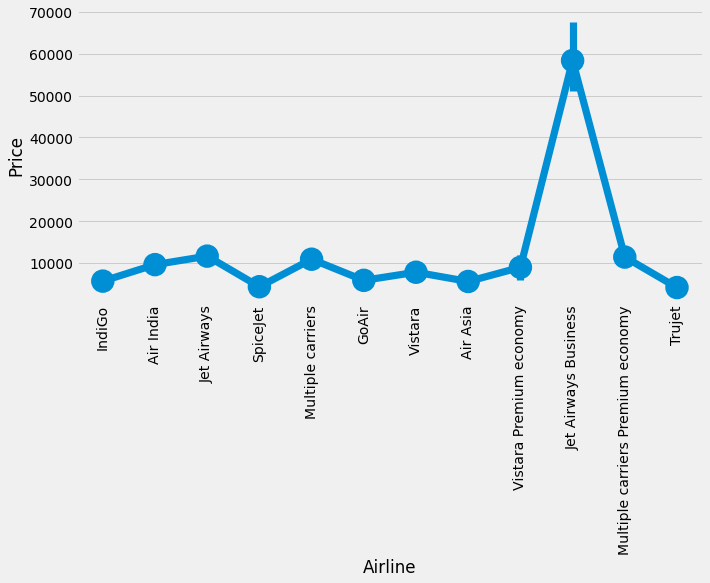

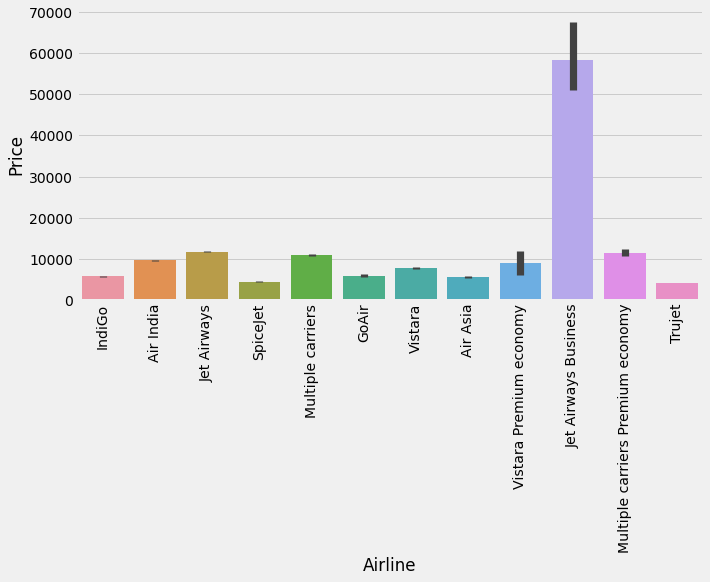

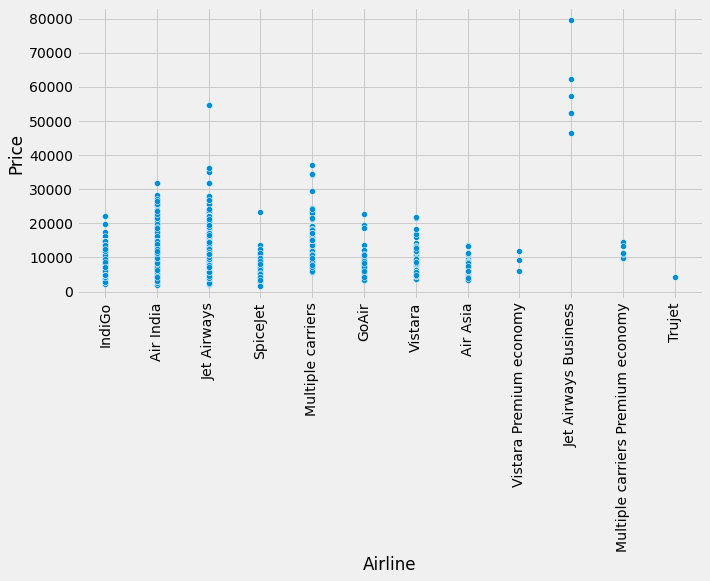

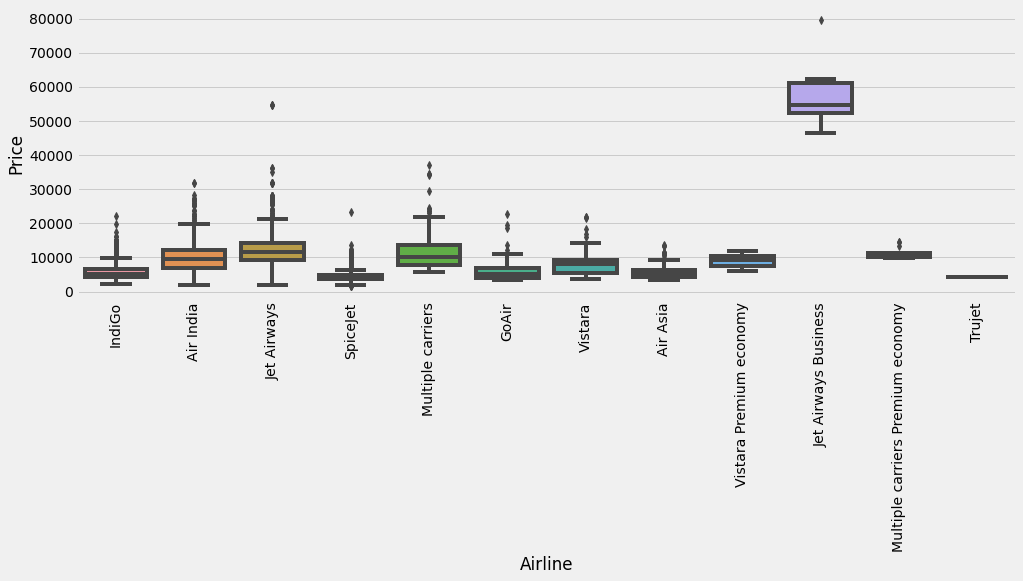

In [14]:
#violinplot and kde plot to see distribution of Education and w.r.t to Loan_Status
plt.figure(figsize=(10,5))

sb.pointplot(data_train['Airline'],data_train['Price'])
plt.xticks(rotation=90)
plt.figure(figsize=(10,5))

sb.barplot(data_train['Airline'],data_train['Price'])
plt.xticks(rotation=90)

plt.figure(figsize=(10,5))
sb.scatterplot(data_train['Airline'],data_train['Price'])
plt.xticks(rotation=90)

plt.figure(figsize=(15,5))
sb.boxplot(data_train['Airline'],data_train['Price'])
plt.xticks(rotation=90)


#### OBSERVATIONS:
    - Jet Airways Business  has highest Average flight price of 58K.
    - Lowest Price is for trujet/spicejet as you can see below . lowest price for Trujet and Spicejet.
    - Others AVERAGE FLIGHT Price lie in moderate range price btw 12k -8k.
    
    
    - From the Scatter Plot we see Jet Airways  business only has flight prices over 40k.
    - Jet airways and Air India are  evenly scattered above 0 to 30k.
    - indigo, vistara has price range below 20K.
    -  Go air ranges between 2k - 15k.
    - Vistara PRemium bussiness has prices aobve 5K - 15K.
    - Multiple Carrier Flights ranges from 5K -25K. And premium rage from 10-15k
    - Spicejet prices ranges from 2k - 14K.

In [15]:
data_train.groupby(by='Airline').mean()

,Price
Airline,
Air Asia,5590.260188
Air India,9612.427756
GoAir,5861.056701
IndiGo,5673.682903
Jet Airways,11643.923357
Jet Airways Business,58358.666667
Multiple carriers,10902.678094
Multiple carriers Premium economy,11418.846154
SpiceJet,4338.284841


(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
        34, 35, 36, 37, 38, 39, 40, 41, 42, 43]),
 [Text(0, 0, '24/03/2019'),
  Text(1, 0, '1/05/2019'),
  Text(2, 0, '9/06/2019'),
  Text(3, 0, '12/05/2019'),
  Text(4, 0, '01/03/2019'),
  Text(5, 0, '24/06/2019'),
  Text(6, 0, '12/03/2019'),
  Text(7, 0, '27/05/2019'),
  Text(8, 0, '1/06/2019'),
  Text(9, 0, '18/04/2019'),
  Text(10, 0, '9/05/2019'),
  Text(11, 0, '24/04/2019'),
  Text(12, 0, '3/03/2019'),
  Text(13, 0, '15/04/2019'),
  Text(14, 0, '12/06/2019'),
  Text(15, 0, '6/03/2019'),
  Text(16, 0, '21/03/2019'),
  Text(17, 0, '3/04/2019'),
  Text(18, 0, '6/05/2019'),
  Text(19, 0, '15/05/2019'),
  Text(20, 0, '18/06/2019'),
  Text(21, 0, '15/06/2019'),
  Text(22, 0, '6/04/2019'),
  Text(23, 0, '18/05/2019'),
  Text(24, 0, '27/06/2019'),
  Text(25, 0, '21/05/2019'),
  Text(26, 0, '06/03/2019'),
  Text(27, 0, '3/06/2019'),
  Text

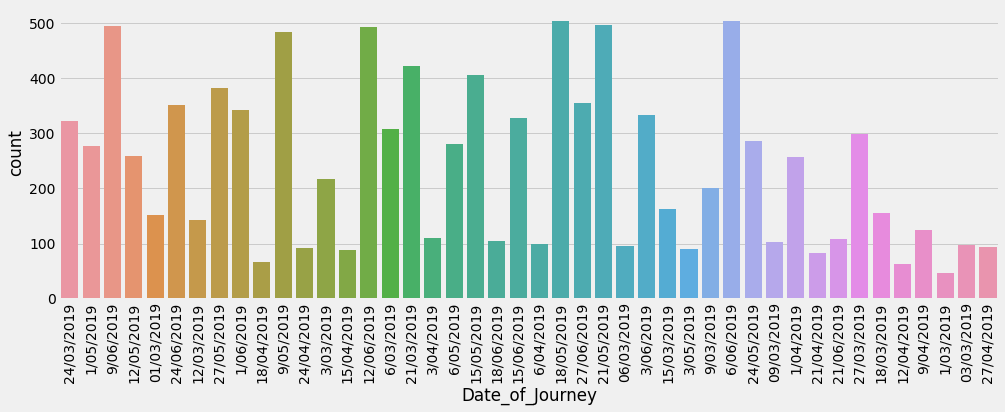

In [16]:

plt.figure(figsize=(15,5))

sb.countplot(data_train['Date_of_Journey'])

plt.xticks(rotation=90)

##### OBSERVATIONS
     - FROM DATE OF JOURNEY, we can extract day of Journey, month of jouney , YEAR OF JOURNEY not needed as same for all DAta.

In [17]:
### Converting date of journet to datetime object

In [18]:
data_train['Date_of_Journey']  = pd.to_datetime(data_train['Date_of_Journey'])
data_test['Date_of_Journey'] = pd.to_datetime(data_test['Date_of_Journey'])

In [19]:
data_train['Journey_month'] = data_train['Date_of_Journey'].apply(lambda x : x.month)
data_train['Journey_day'] = data_train['Date_of_Journey'].apply(lambda x : x.day)

data_test['Journey_month'] = data_test['Date_of_Journey'].apply(lambda x : x.month)
data_test['Journey_day'] = data_test['Date_of_Journey'].apply(lambda x : x.day)

In [20]:
data_train.groupby(by='Journey_month')['Price'].sum()

Journey_month
1     11279591
3     18647220
4      2217885
5     19414875
6     23361671
9     13429373
12     8719011
Name: Price, dtype: int64

####  Observation
    6th Month has highest Sum of flight prices suggesting highest sale of flight, profit margin wise is for mnoth of JUNE. and Lowest sale of Flgihts is for month of APril.

(array([ 0.,  2.,  4.,  6.,  8., 10., 12., 14.]),
 [Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, '')])

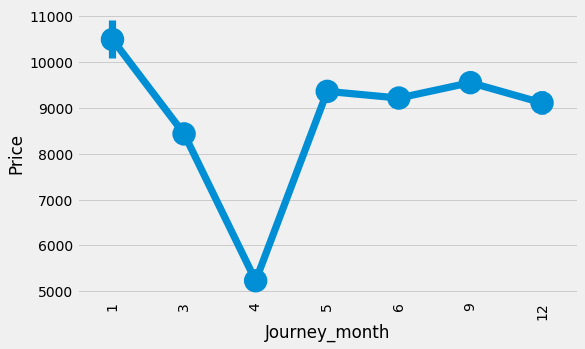

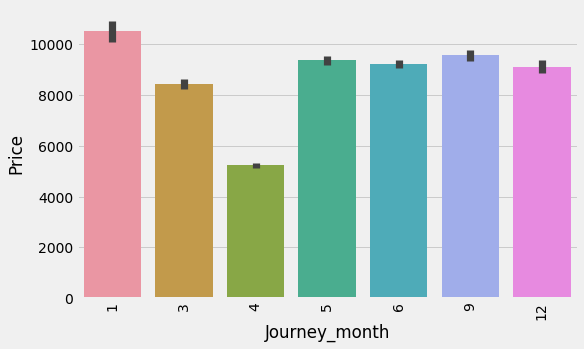

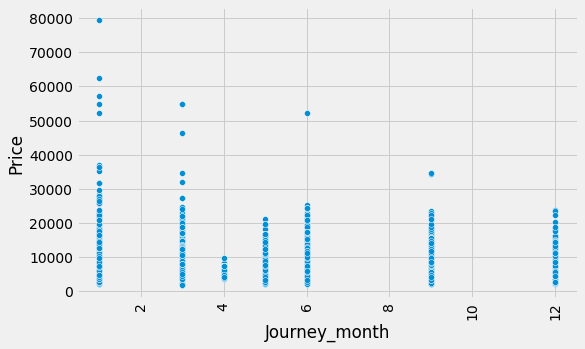

In [21]:
plt.figure(figsize=(8,5))

sb.pointplot(data_train['Journey_month'],data_train['Price'])
plt.xticks(rotation=90)
plt.figure(figsize=(8,5))

sb.barplot(data_train['Journey_month'],data_train['Price'])
plt.xticks(rotation=90)

plt.figure(figsize=(8,5))
sb.scatterplot(data_train['Journey_month'],data_train['Price'])
plt.xticks(rotation=90)

#### OBSERVATIONS:
    - Highest Average flight Price is for month of January. And Lowest for April.
    - For month of 1,3 flgiht price above 25K, 
    - For months 5,6,9,12 flight price ranges between 1k-25k.
  
    

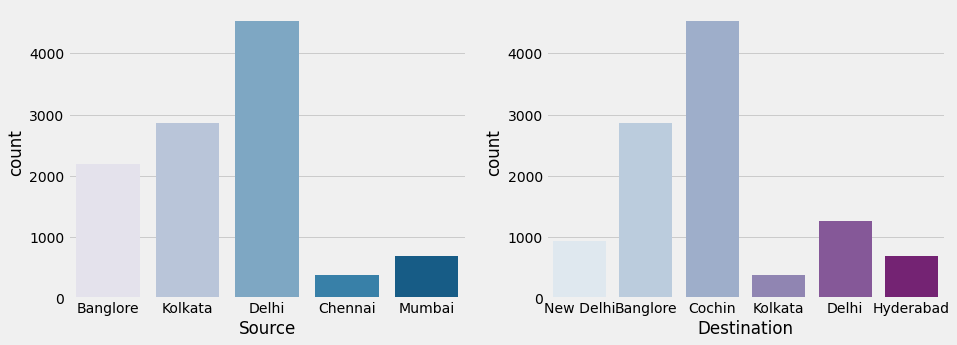

In [22]:
#### Visualizing Source and Destination , And Souce and Destnation with Price of FLight.
fig,ax =plt.subplots(1,2, figsize=(14,5))
sb.countplot(data_train['Source'], ax=ax[0],palette='PuBu')
sb.countplot(data_train['Destination'], ax=ax[1],palette='BuPu')

fig.show()




#### OBSERVATIONS:
        --- Max flgihts have source has delhi and Max Flgihts have Destination with Cochin.
        --- least no of flgihts have source has chennai and least number of Flgihts have Destination with Kolkata.
        

([0, 1, 2, 3, 4],
 [Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, '')])

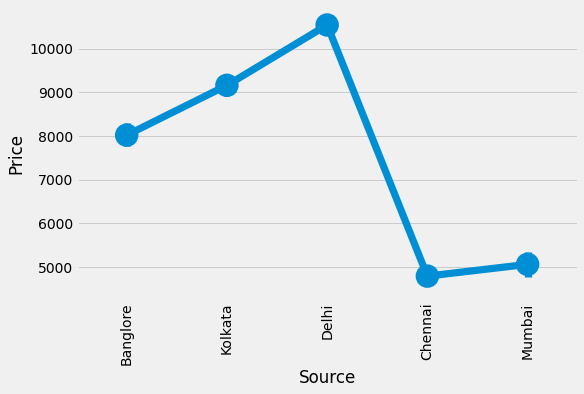

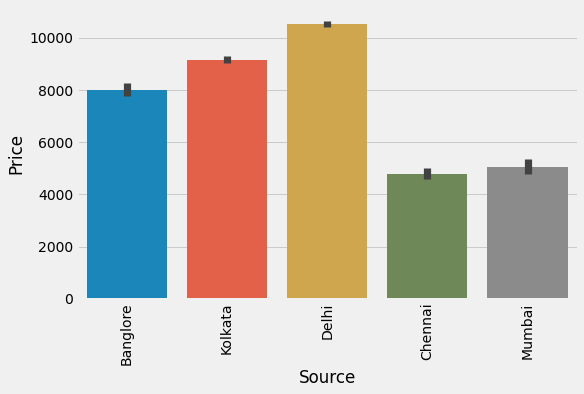

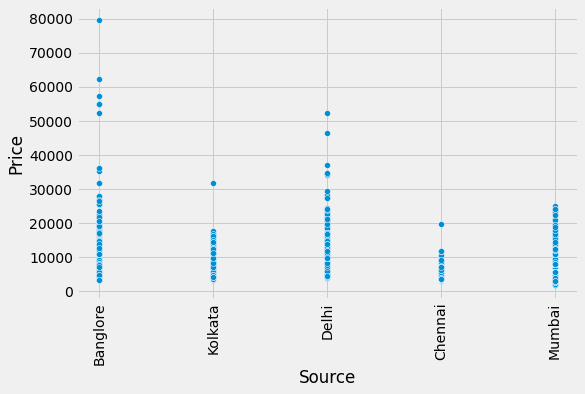

In [23]:
plt.figure(figsize=(8,5))

sb.pointplot(data_train['Source'],data_train['Price'])
plt.xticks(rotation=90)
plt.figure(figsize=(8,5))

sb.barplot(data_train['Source'],data_train['Price'])
plt.xticks(rotation=90)

plt.figure(figsize=(8,5))
sb.scatterplot(data_train['Source'],data_train['Price'])
plt.xticks(rotation=90)

#### OBSERVATIONS for Source.

    - --- Average Price of Flight for Source is highest for Delhi.
        --- Least Average Flight price for Source is for Chenna.
        ---Flight Price for majority datapoints of mumbai is between 1k-25k.Evenly scatterly.
        ---Flight Price for majority datapoints of Chennai is between 2k-12k.Evenly scatterly.
        ---Flight Price for majority datapoints of Delhi is between 5k-30k.Evenly scatterly.
        ---Flight Price for majority datapoints of Kolkata is between 5k-19k.Evenly scatterly.
        ---Flight Price for majority datapoints of Bangalore is between 2k-30k.Evenly scatterly.

([0, 1, 2, 3, 4, 5],
 [Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, '')])

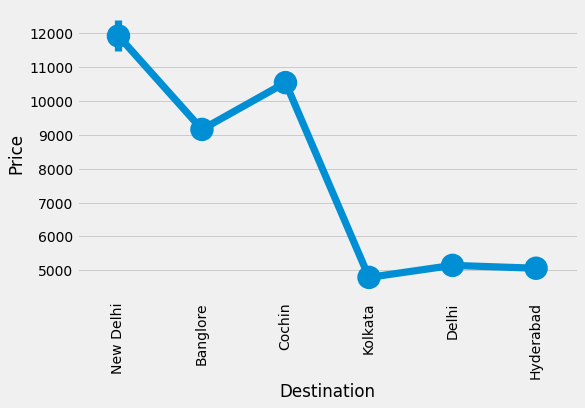

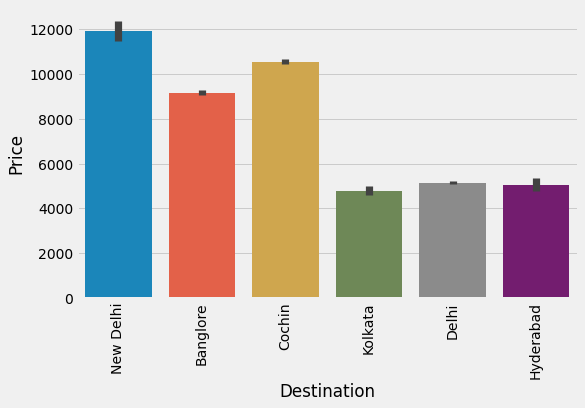

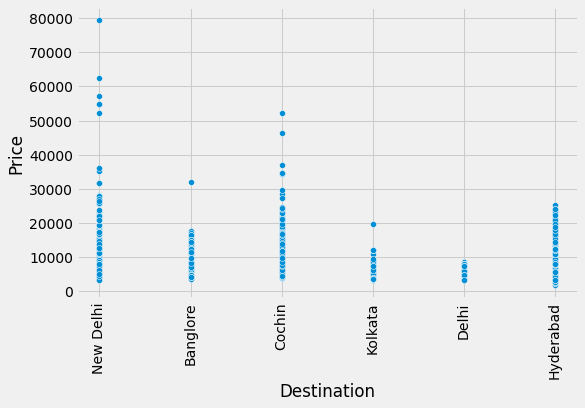

In [24]:
plt.figure(figsize=(8,5))

sb.pointplot(data_train['Destination'],data_train['Price'])
plt.xticks(rotation=90)
plt.figure(figsize=(8,5))

sb.barplot(data_train['Destination'],data_train['Price'])
plt.xticks(rotation=90)

plt.figure(figsize=(8,5))
sb.scatterplot(data_train['Destination'],data_train['Price'])
plt.xticks(rotation=90)

#### OBSERVATIONS for Destination.

        --- Average Highest Price of Flight  for Destination is fort New Delhi.
        --- Least Average Flight price For Destnation  IS FOR kOLKATA.
        --- Flight Price for majority datapoints of New Delhi is between 2k-30k.Evenly scatterly.
        --- Flight Price for majority datapoints of Bangaore is between 2k-19k.Evenly scatterly.
        --- Flight Price for majority datapoints of Delhi is below 10k.Evenly scatterly.
        --- Flight Price for majority datapoints of Kolkata is between 2k-13k.Evenly scatterly.
        --- Flight Price for majority datapoints of Cochin is between 4k-30k.Evenly scatterly.
        --- Flight Price for majority datapoints of Hyderabad is below 27k.Evenly scatterly.

([0, 1, 2, 3, 4, 5],
 [Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, '')])

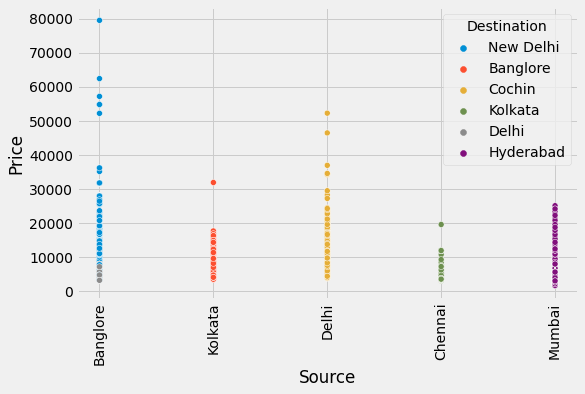

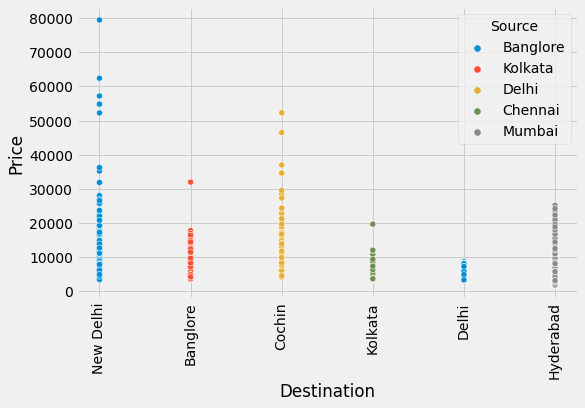

In [25]:

plt.figure(figsize=(8,5))
sb.scatterplot(data_train['Source'],data_train['Price'],hue=data_train['Destination'])
plt.xticks(rotation=90)

plt.figure(figsize=(8,5))
sb.scatterplot(data_train['Destination'],data_train['Price'],hue=data_train['Source'])
plt.xticks(rotation=90)


##### OBSERVATIONS:
    --- ALL Flgihts  from Bangalore fly to Delhi and new Delhi.
    --- All FLights From Kolkata fly to bangalore
    --- All FLights From Delhi fly to Cochin.
    --- All FLights From Chennai fly to Kolkata.
    --- All FLights From MUmbai  fly to Hyderabad.
   

In [26]:
data_train['Total_Stops'].value_counts()

1 stop      5625
non-stop    3491
2 stops     1520
3 stops       45
4 stops        1
Name: Total_Stops, dtype: int64

#### OBSERVATIONS:
    - AS you can See Average price of 4 stops is highest which contanis only 1 flight,this creates imbalanced categories.
    - INstead we can merge small categories like 2,3, 4 stopis together to have nearly balanced data. Otherwise stops wouldnot give correlation with Price.
    
    

In [27]:
data_train.groupby(by='Total_Stops')['Price'].mean()

Total_Stops
1 stop      10594.123556
2 stops     12715.807895
3 stops     13112.000000
4 stops     17686.000000
non-stop     5024.900315
Name: Price, dtype: float64

In [28]:
data_train['stops'] = data_train['Total_Stops'].apply(lambda x: x.replace('3 stops','2 +').replace('4 stops','2 +').replace('2 stops','2 +'))
data_test['stops'] = data_test['Total_Stops'].apply(lambda x: x.replace('3 stops','2 +').replace('4 stops','2 +').replace('2 stops','2 +'))

In [29]:
data_train['stops'].value_counts()

1 stop      5625
non-stop    3491
2 +         1566
Name: stops, dtype: int64

In [30]:
data_train.groupby(by='stops')['Price'].mean()

stops
1 stop      10594.123556
2 +         12730.366539
non-stop     5024.900315
Name: Price, dtype: float64

(array([0, 1, 2]),
 [Text(0, 0, 'non-stop'), Text(1, 0, '2 +'), Text(2, 0, '1 stop')])

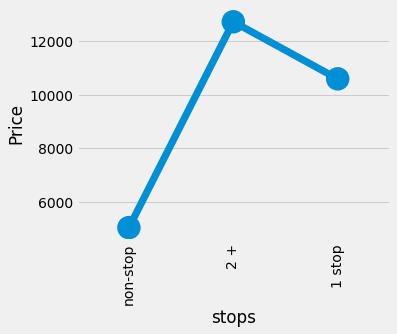

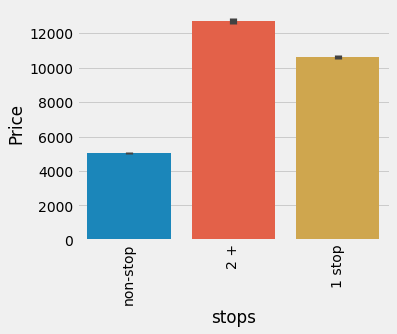

In [31]:
plt.figure(figsize=(5,4))

sb.pointplot(data_train['stops'],data_train['Price'])
plt.xticks(rotation=90)
plt.figure(figsize=(5,4))

sb.barplot(data_train['stops'],data_train['Price'])
plt.xticks(rotation=90)


#### OBSERVATIONS:
    -  None Stop have lowest Average price while 2+ stops have highest average price.
    - 

([0, 1, 2], [Text(0, 0, ''), Text(0, 0, ''), Text(0, 0, '')])

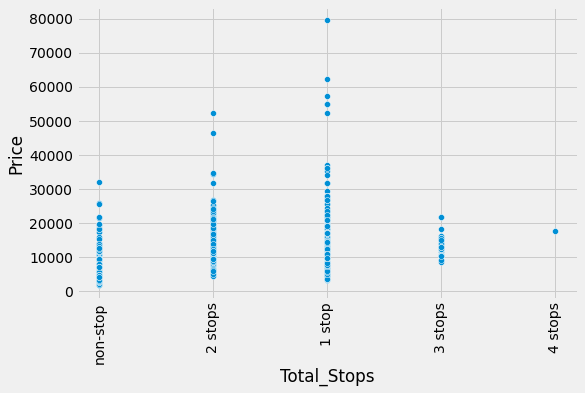

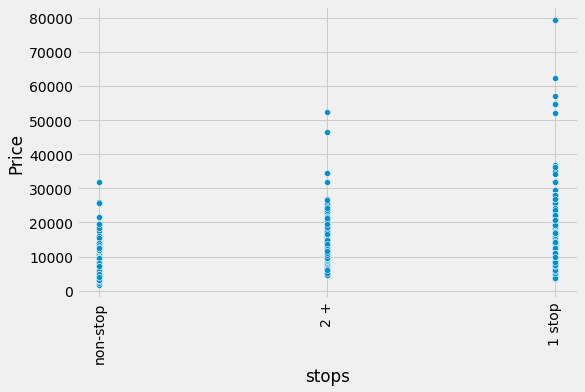

In [32]:
plt.figure(figsize=(8,5))
sb.scatterplot(data_train['Total_Stops'],data_train['Price'])
plt.xticks(rotation=90)


plt.figure(figsize=(8,5))
sb.scatterplot(data_train['stops'],data_train['Price'])
plt.xticks(rotation=90)

##### OBSERVATIONS:
    - non stop flights have price range of 0-21 k .
    - 2 stop flgihts have price range of   5 - 27k.
    - 1 stop flgihts have price range of   5 - 35k.
    - 3 stop flgihts have price range of   8 - 20k.
    - 4 stop has 1 flight with price of around 18K.
    
  #### AFTER GROUPING OF NON STOP , 1 STOP , 2+ stops Flights,
  
      - 2+ stops have price range between 4k - 27k.
    
   
    

([0, 1, 2], [Text(0, 0, ''), Text(0, 0, ''), Text(0, 0, '')])

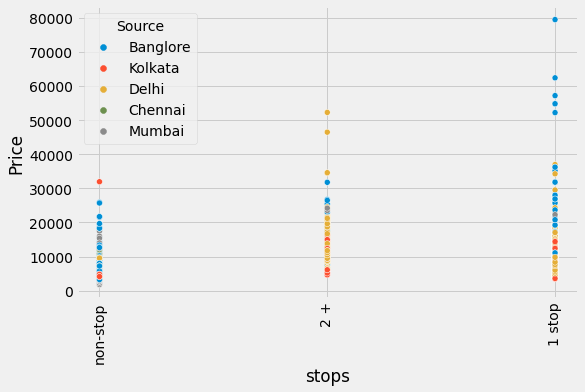

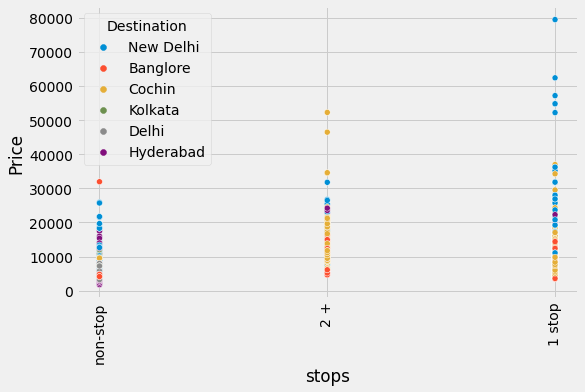

In [33]:

plt.figure(figsize=(8,5))
sb.scatterplot(data_train['stops'],data_train['Price'],hue=data_train['Source'])
plt.xticks(rotation=90)


plt.figure(figsize=(8,5))
sb.scatterplot(data_train['stops'],data_train['Price'],hue=data_train['Destination'])
plt.xticks(rotation=90)

###### OBSERVATIONS
        - 2+ stops have highest count cochin as destination.
        - Destination New, delhi are in highest in non-stop flights.
        - 1 stop has max counts of destination flgiht with cochin,new delhi.
        
        
        - flights from Delhi  are distributed are concentrated in 1 stop , 2 stop.
        - flgihts from Bangalore have all stopp flights like no stops, 1 stops, 2+ stops.
         

######  OBSERVATIONS

        - 
        - ROUTE, Addtionnal info can be dropped as route information is already present in pther features and addtional features has max cuont of data with No info that cause noise in performance of data.
        
        
 #### EXTRACTING TOTAL DURATION FROM DURATION FEATURE


In [34]:
duration = []
for i in data_train['Duration']:
    li = []
    li = i.split()
    if(len(li) == 1 ):
    
        if(li[0].find('h')>0):
            duration.append(int(li[0].replace('h','')))
                
        elif(li[0].find('m') >0):
            duration.append(int(li[0].replace('m',''))/100)
                
    elif (len(li) == 2):
        
        duration.append(   int(li[0].replace('h','')) +  int(li[1].replace('m',''))/100   )  
    
        

In [35]:
len(duration)

10682

In [36]:
duration_t = []
for i in data_test['Duration']:
    li = []
    li = i.split()
    if(len(li) == 1 ):
    
        if(li[0].find('h')>0):
            duration_t.append(int(li[0].replace('h','')))
                
        elif(li[0].find('m') >0):
            duration_t.append(int(li[0].replace('m',''))/100)
                
    elif (len(li) == 2):
        
        duration_t.append(int(li[0].replace('h','')) +  int(li[1].replace('m',''))/100   )  
    
     

In [37]:
data_train['total_duration'] = duration


data_test['total_duration'] = duration_t


Skewness: 0.8575994000551097


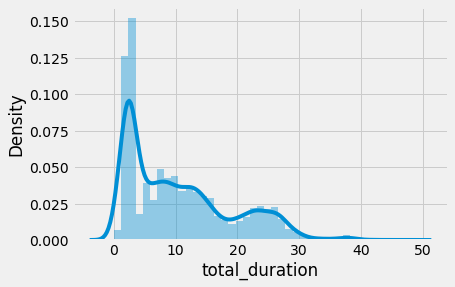

In [38]:
sb.distplot(data_train['total_duration'])
print('Skewness:',data_train['total_duration'].skew())

<AxesSubplot:xlabel='stops', ylabel='total_duration'>

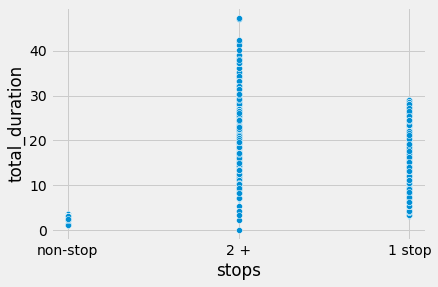

In [39]:
sb.scatterplot(data_train['stops'],data_train['total_duration'])

#### OBSERVATIONS:
    - 1 stop has highest duration flights.

Flight Price Corelation with  total_duration    0.507468
dtype: float64


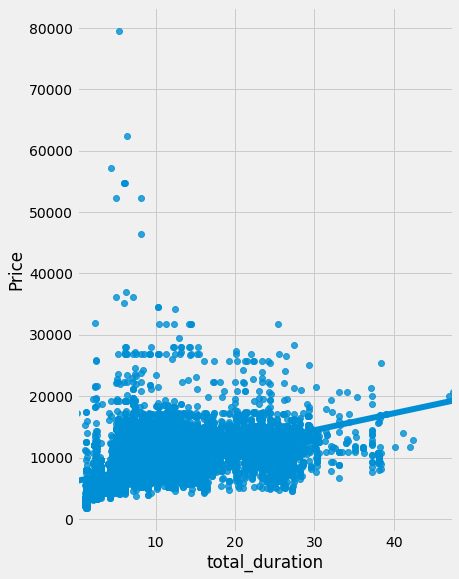

In [40]:
plt.figure(figsize=(6,9))
sb.regplot(data_train['total_duration'],data_train['Price'])
print('Flight Price Corelation with ',str(pd.DataFrame(data_train['total_duration']).corrwith(data_train['Price'])))

##### linear relationship observed, with increase with total duration of flight, price of flight increases, Some extreme values detected but extreme values can be usefull for prediction as it might be premium airline.

In [41]:
data_train

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price,Journey_month,Journey_day,stops,total_duration
0,IndiGo,2019-03-24,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897,3,24,non-stop,2.50
1,Air India,2019-01-05,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,No info,7662,1,5,2 +,7.25
2,Jet Airways,2019-09-06,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25 10 Jun,19h,2 stops,No info,13882,9,6,2 +,19.00
3,IndiGo,2019-12-05,Kolkata,Banglore,CCU → NAG → BLR,18:05,23:30,5h 25m,1 stop,No info,6218,12,5,1 stop,5.25
4,IndiGo,2019-01-03,Banglore,New Delhi,BLR → NAG → DEL,16:50,21:35,4h 45m,1 stop,No info,13302,1,3,1 stop,4.45
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10678,Air Asia,2019-09-04,Kolkata,Banglore,CCU → BLR,19:55,22:25,2h 30m,non-stop,No info,4107,9,4,non-stop,2.30
10679,Air India,2019-04-27,Kolkata,Banglore,CCU → BLR,20:45,23:20,2h 35m,non-stop,No info,4145,4,27,non-stop,2.35
10680,Jet Airways,2019-04-27,Banglore,Delhi,BLR → DEL,08:20,11:20,3h,non-stop,No info,7229,4,27,non-stop,3.00
10681,Vistara,2019-01-03,Banglore,New Delhi,BLR → DEL,11:30,14:10,2h 40m,non-stop,No info,12648,1,3,non-stop,2.40


#### FEATURE ENGNIEERING WITH  ARRRIVAL TIME AND DEPARTURE TIME
    - Creating Arrival_time_category and departure time  as Morning Flight , Afternoon Flight , Evening flight , Night flight

In [42]:

# extracting time elements from arrival time
data_train['Arrival_Time'] = data_train['Arrival_Time'].apply(lambda x:x.split()[0])
data_test['Arrival_Time'] = data_test['Arrival_Time'].apply(lambda x:x.split()[0])



In [43]:
### Spliting hours and mins  and stornig it in a list 
arrival = data_train['Arrival_Time'] .str.split(':', expand=True).astype(int)
arrival_test = data_test['Arrival_Time'].str.split(':', expand=True).astype(int)

departure = data_train['Dep_Time'] .str.split(':', expand=True).astype(int)
departure_test = data_test['Dep_Time'].str.split(':', expand=True).astype(int)


In [44]:
# convertnig list elements of the hours and mins to Delta time 

train_arrival = pd.to_timedelta(arrival[0], unit='h') + pd.to_timedelta(arrival[1], unit='m')
test_arrival = pd.to_timedelta(arrival_test[0], unit='h') + pd.to_timedelta(arrival_test[1], unit='m')

train_departure = pd.to_timedelta(departure[0], unit='h') + pd.to_timedelta(departure[1], unit='m')
test_departure = pd.to_timedelta(departure_test[0], unit='h') + pd.to_timedelta(departure_test[1], unit='m')

In [45]:
### replacing arrival / departure time with delta time
data_train['Arrival_Time'] = train_arrival
data_test['Arrival_Time'] = test_arrival


data_train['Dep_Time'] = train_departure
data_test['Dep_Time'] = test_arrival

In [46]:
## Creating a Feature of Arrival_Category and Departure Category getting to know whether a flgiht is a morning/ nooo,eve or night flgiht.

arr_category =[]
for i in data_train['Arrival_Time']:
    if((i >= pd.to_timedelta('04:00:00')) & (i< pd.to_timedelta('12:00:00'))) :
        arr_category.append('morinig')
    elif((i >= pd.to_timedelta('12:00:00')) & (i< pd.to_timedelta('19:00:00'))) :
        arr_category.append('noon/evening')
    elif((i >= pd.to_timedelta('19:00:00')) & (i< pd.to_timedelta('24:00:00'))) :
        arr_category.append('night')
    elif((i >= pd.to_timedelta('00:00:00')) & (i< pd.to_timedelta('04:00:00'))) :
        arr_category.append('night')

        
dep_category =[]
for i in data_train['Dep_Time']:
    if((i >= pd.to_timedelta('04:00:00')) & (i< pd.to_timedelta('12:00:00'))) :
        dep_category.append('morinig')
    elif((i >= pd.to_timedelta('12:00:00')) & (i< pd.to_timedelta('19:00:00'))) :
        dep_category.append('noon/evening')
    elif((i >= pd.to_timedelta('19:00:00')) & (i< pd.to_timedelta('24:00:00'))) :
        dep_category.append('night')
    elif((i >= pd.to_timedelta('00:00:00')) & (i< pd.to_timedelta('04:00:00'))) :
        dep_category.append('night')
   
   
   

In [47]:
## Creating a Feature of Arrival_Category and Departure Category getting to know whether a flgiht is a morning/ nooo,eve or night flgiht.

arr_category_t =[]
for i in data_test['Arrival_Time']:
    if((i >= pd.to_timedelta('04:00:00')) & (i< pd.to_timedelta('12:00:00'))) :
        arr_category_t.append('morinig')
    elif((i >= pd.to_timedelta('12:00:00')) & (i< pd.to_timedelta('19:00:00'))) :
        arr_category_t.append('noon/evening')
    elif((i >= pd.to_timedelta('19:00:00')) & (i< pd.to_timedelta('24:00:00'))) :
        arr_category_t.append('night')
    elif((i >= pd.to_timedelta('00:00:00')) & (i< pd.to_timedelta('04:00:00'))) :
        arr_category_t.append('night')
    
dep_category_t =[]
for i in data_test['Dep_Time']:
    if((i >= pd.to_timedelta('04:00:00')) & (i< pd.to_timedelta('12:00:00'))) :
        dep_category_t.append('morinig')
    elif((i >= pd.to_timedelta('12:00:00')) & (i< pd.to_timedelta('19:00:00'))) :
        dep_category_t.append('noon/evening')
    elif((i >= pd.to_timedelta('19:00:00')) & (i< pd.to_timedelta('24:00:00'))) :
        dep_category_t.append('night')
    elif((i >= pd.to_timedelta('00:00:00')) & (i< pd.to_timedelta('04:00:00'))) :
        dep_category_t.append('night')
    
 

In [48]:
data_train['Arrival_Category'] = arr_category
data_test['Arrival_Category'] = arr_category_t


data_train['Dep_Category'] = dep_category
data_test['Dep_Category'] = dep_category_t

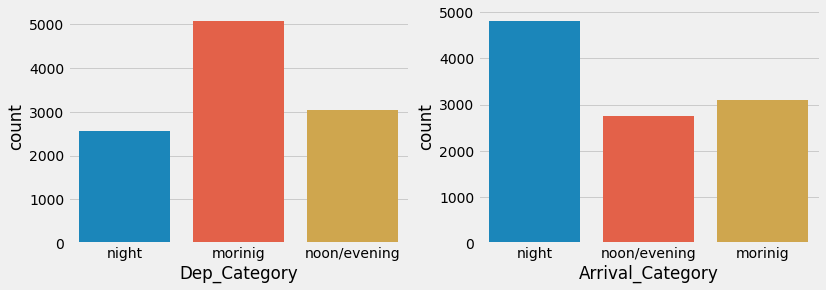

In [49]:

fig,ax =plt.subplots(1,2, figsize=(12,4))
sb.countplot(data_train['Dep_Category'], ax=ax[0])
sb.countplot(data_train['Arrival_Category'], ax=ax[1])

fig.show()

##### OBSERVATIONS:
    - Highest count of flights are in morning.
    - Lowest count of flgiht timing in the night,
    - Highest count of flights land at night.
    - highest cuont of flgiht lands in  noon/evening

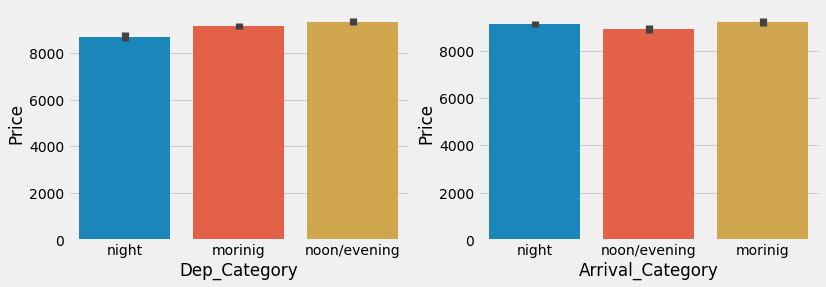

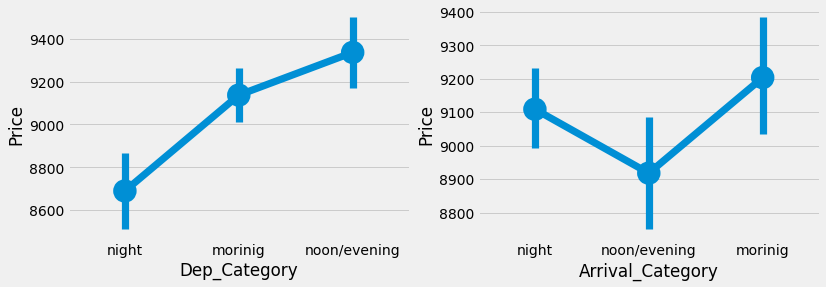

In [50]:

fig,ax =plt.subplots(1,2, figsize=(12,4))
sb.barplot(data_train['Dep_Category'],data_train['Price'], ax=ax[0])
sb.barplot(data_train['Arrival_Category'],data_train['Price'], ax=ax[1])

fig.show()


fig,ax =plt.subplots(1,2, figsize=(12,4))
sb.pointplot(data_train['Dep_Category'],data_train['Price'], ax=ax[0])
sb.pointplot(data_train['Arrival_Category'],data_train['Price'], ax=ax[1])

fig.show()

#### OBSERVATIONS

    - Night Flights are Cheaper and Evening flights are expensive.
    - Flghits that land in the noon have low price of flgiht.
    - flgihts that land in the morinig have high Price.

(array([  0,   1,   2,   3,   4,   5,   6,   7,   8,   9,  10,  11,  12,
         13,  14,  15,  16,  17,  18,  19,  20,  21,  22,  23,  24,  25,
         26,  27,  28,  29,  30,  31,  32,  33,  34,  35,  36,  37,  38,
         39,  40,  41,  42,  43,  44,  45,  46,  47,  48,  49,  50,  51,
         52,  53,  54,  55,  56,  57,  58,  59,  60,  61,  62,  63,  64,
         65,  66,  67,  68,  69,  70,  71,  72,  73,  74,  75,  76,  77,
         78,  79,  80,  81,  82,  83,  84,  85,  86,  87,  88,  89,  90,
         91,  92,  93,  94,  95,  96,  97,  98,  99, 100, 101, 102, 103,
        104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116,
        117, 118, 119, 120, 121, 122, 123, 124, 125, 126, 127]),
 [Text(0, 0, 'BLR → DEL'),
  Text(1, 0, 'CCU → IXR → BBI → BLR'),
  Text(2, 0, 'DEL → LKO → BOM → COK'),
  Text(3, 0, 'CCU → NAG → BLR'),
  Text(4, 0, 'BLR → NAG → DEL'),
  Text(5, 0, 'CCU → BLR'),
  Text(6, 0, 'BLR → BOM → DEL'),
  Text(7, 0, 'DEL → BOM → COK'),
  Text(8, 0, '

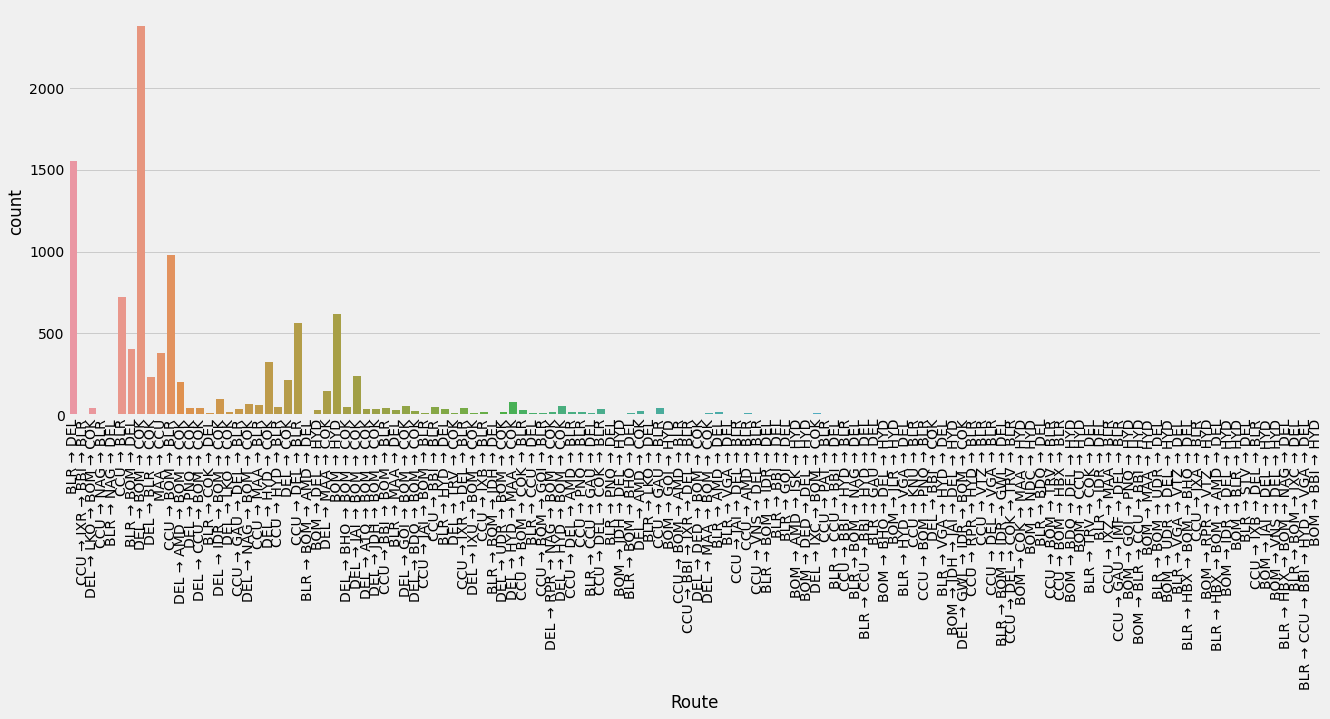

In [51]:
plt.figure(figsize=(20,7))
sb.countplot(data_train['Route']
            )
plt.xticks(rotation=90)

In [52]:
data_train['Route'].value_counts()[:7]

DEL → BOM → COK    2376
BLR → DEL          1552
CCU → BOM → BLR     979
CCU → BLR           724
BOM → HYD           621
CCU → DEL → BLR     565
BLR → BOM → DEL     402
Name: Route, dtype: int64

#### OBSERVATIONS:
    - we can see the TOp 5 Ruoute in whixh flgihts operate the most are:
        - DELHI - BOM - COK
        - BLR - DEL 
        - CCU - BOM - BLR
        - CCU - BLR
        - BOM - HYB

(array([  0,   1,   2,   3,   4,   5,   6,   7,   8,   9,  10,  11,  12,
         13,  14,  15,  16,  17,  18,  19,  20,  21,  22,  23,  24,  25,
         26,  27,  28,  29,  30,  31,  32,  33,  34,  35,  36,  37,  38,
         39,  40,  41,  42,  43,  44,  45,  46,  47,  48,  49,  50,  51,
         52,  53,  54,  55,  56,  57,  58,  59,  60,  61,  62,  63,  64,
         65,  66,  67,  68,  69,  70,  71,  72,  73,  74,  75,  76,  77,
         78,  79,  80,  81,  82,  83,  84,  85,  86,  87,  88,  89,  90,
         91,  92,  93,  94,  95,  96,  97,  98,  99, 100, 101, 102, 103,
        104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116,
        117, 118, 119, 120, 121, 122, 123, 124, 125, 126, 127]),
 [Text(0, 0, 'BLR → DEL'),
  Text(1, 0, 'CCU → IXR → BBI → BLR'),
  Text(2, 0, 'DEL → LKO → BOM → COK'),
  Text(3, 0, 'CCU → NAG → BLR'),
  Text(4, 0, 'BLR → NAG → DEL'),
  Text(5, 0, 'CCU → BLR'),
  Text(6, 0, 'BLR → BOM → DEL'),
  Text(7, 0, 'DEL → BOM → COK'),
  Text(8, 0, '

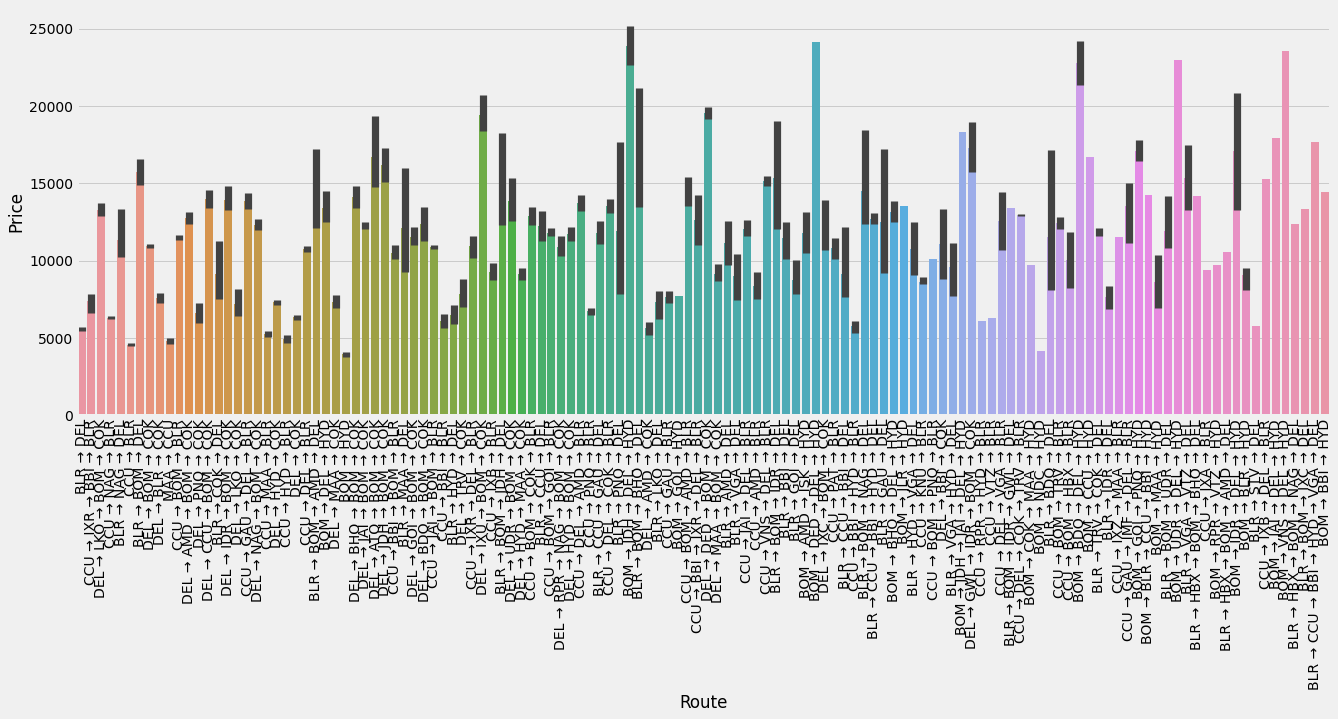

In [53]:
plt.figure(figsize=(20,7))
sb.barplot(data_train['Route'],data_train['Price']
            )
plt.xticks(rotation=90)

#### ROUTES HAVE Quite difference for Prices.

#### LABEL ENCODING 

####  DATA CLEANING 

       DROPPING FEATURES :  total_stops Dep_time, Arrival_Time, Additional Info , dATE OF jOURNEY as new features created of same in feature engineering

In [54]:
feature = ['Additional_Info','Arrival_Time','Dep_Time','Date_of_Journey','Total_Stops','Duration']
data_train.drop(feature,axis=1,inplace=True)

In [55]:
data_test.drop(feature,axis=1,inplace=True)

In [56]:
from sklearn.preprocessing import LabelEncoder

In [57]:
data_train.keys() 


Index(['Airline', 'Source', 'Destination', 'Route', 'Price', 'Journey_month',
       'Journey_day', 'stops', 'total_duration', 'Arrival_Category',
       'Dep_Category'],
      dtype='object')

In [58]:
for i in ['Route','Source','Destination','Airline','stops','Arrival_Category','Dep_Category']:
    data_test[i] = LabelEncoder().fit_transform(data_test[i])
    data_train[i] = LabelEncoder().fit_transform(data_train[i])

#### MULTIVARIANTE ANALYSIS

<AxesSubplot:>

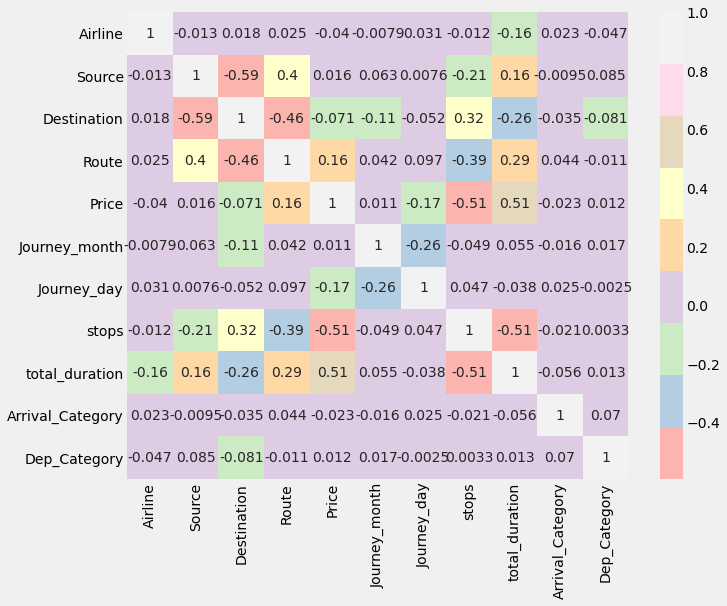

In [59]:
plt.figure(figsize = (10,8))
sb.heatmap(data_train.corr(),annot=True,cmap='Pastel1'
          )

#### OBSERVATIONS:
    - Price is Highly corelated with total_duration,stops. Moderately corelated with journey_day, Route.
    - Multicollinearity observed between:
         - Stops and Total_duration
         - Destination and Source, which we observed IN EDA.
        

#### DISTRIBUTION PLOT of PRICE

<AxesSubplot:xlabel='Price', ylabel='Density'>

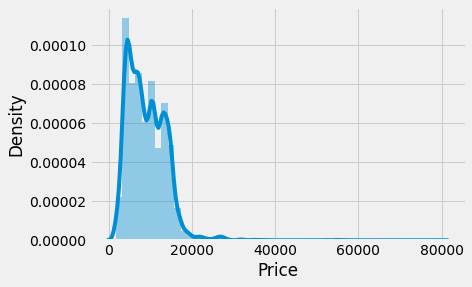

In [60]:
sb.distplot(data_train['Price'])

In [61]:
data_train.skew()

Airline             0.731057
Source             -0.424023
Destination         1.244046
Route              -0.501911
Price               1.812405
Journey_month       0.629556
Journey_day         0.367212
stops               0.403132
total_duration      0.857599
Arrival_Category    0.052572
Dep_Category        0.373442
dtype: float64

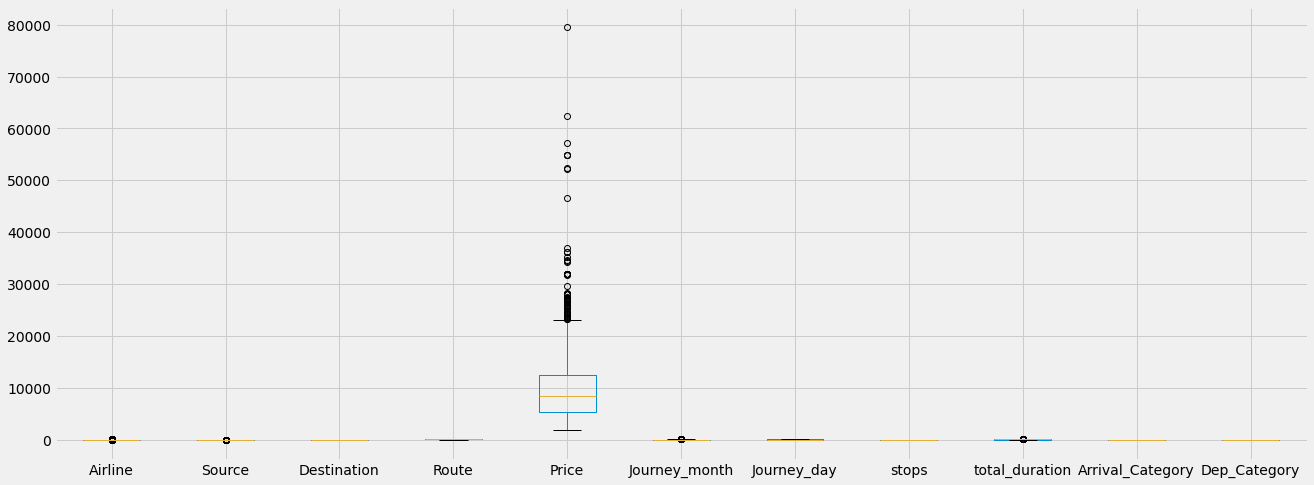

In [62]:
data_train.boxplot(figsize=[20,10])
plt.subplots_adjust(bottom=.25)
plt.show()

####  OUtliers Present in TARGET VRIABLE, we dont treat target Variable.

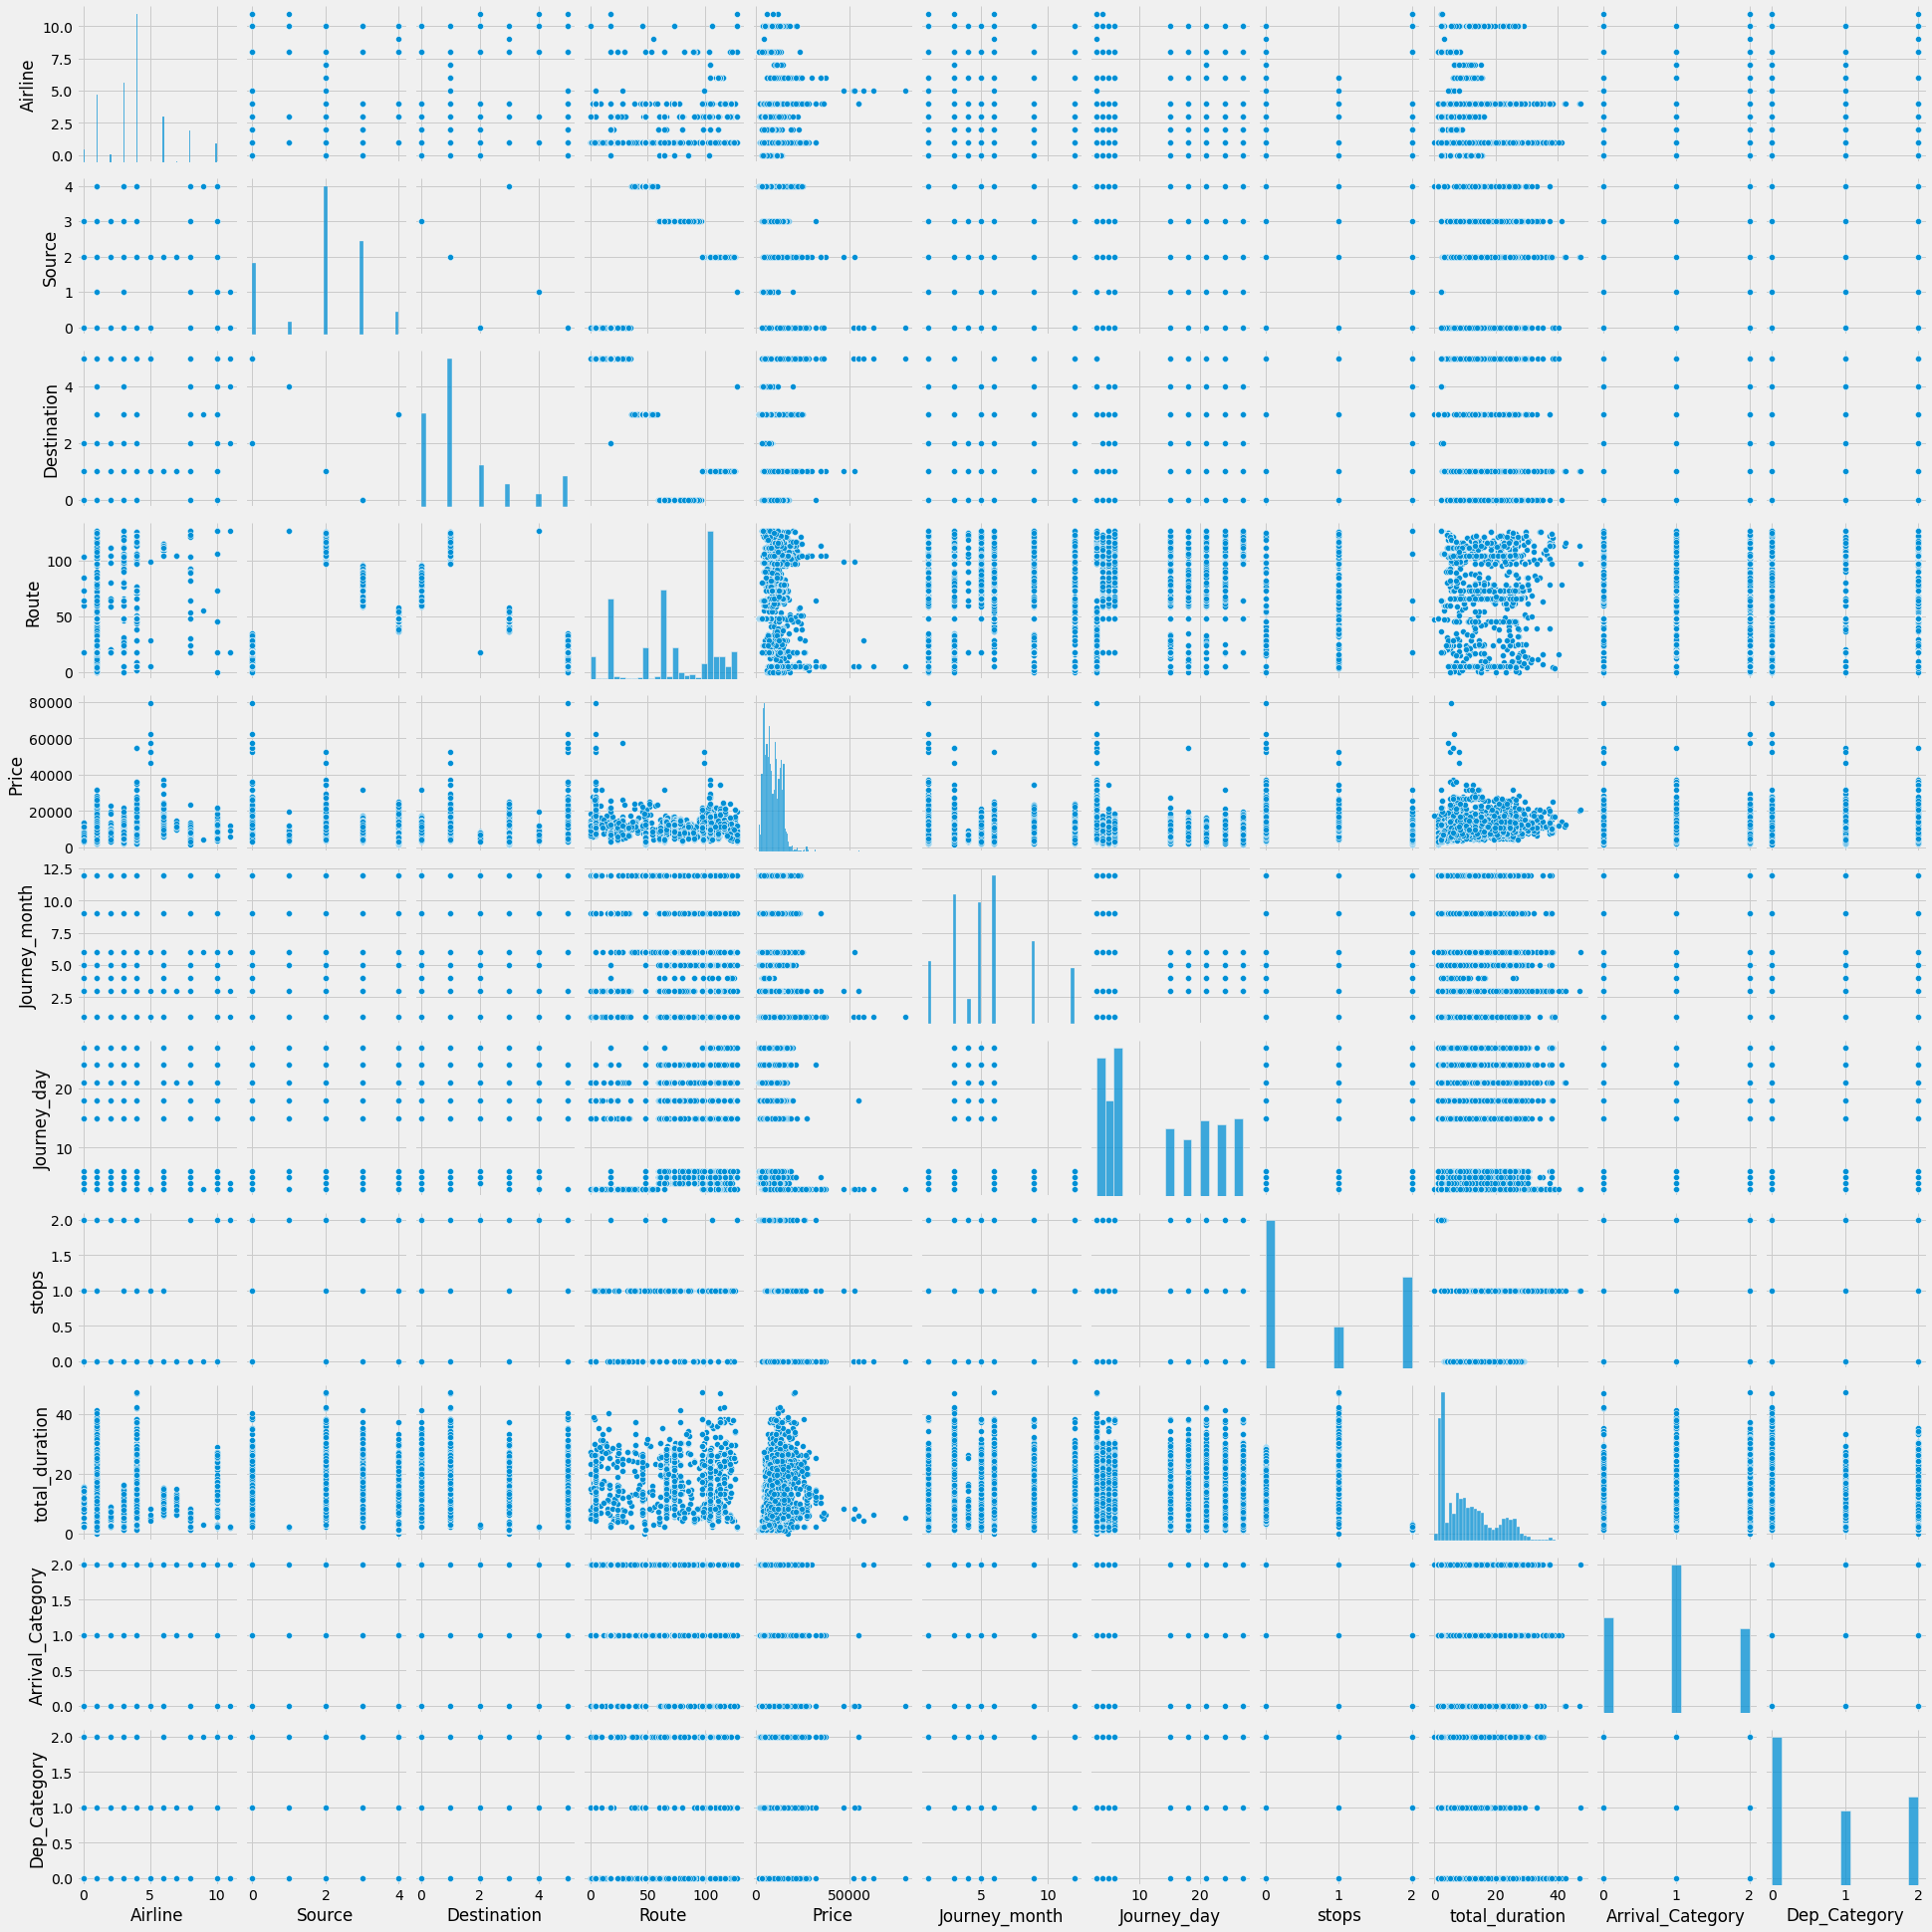

In [63]:
sb.pairplot(data_train)

In [64]:
from sklearn.preprocessing import StandardScaler

In [65]:

x1 = data_train.drop('Price',axis=1)

In [66]:
x1

,Airline,Source,Destination,Route,Journey_month,Journey_day,stops,total_duration,Arrival_Category,Dep_Category
0,3,0,5,18,3,24,2,2.50,1,1
1,1,3,0,84,1,5,1,7.25,2,0
2,4,2,1,118,9,6,1,19.00,0,0
3,3,3,0,91,12,5,0,5.25,1,2
4,3,0,5,29,1,3,0,4.45,1,2
...,...,...,...,...,...,...,...,...,...,...
10678,0,3,0,64,9,4,2,2.30,1,1
10679,1,3,0,64,4,27,2,2.35,1,1
10680,4,0,2,18,4,27,2,3.00,0,0
10681,10,0,5,18,1,3,2,2.40,2,0


In [69]:
for i in x1.columns:
    if(x1[i].dtype =='object'):
        x1[i] = LabelEncoder().fit_transform(x1[i])

In [70]:
x1.skew()

Airline             0.731057
Source             -0.424023
Destination         1.244046
Route              -0.501911
Journey_month       0.629556
Journey_day         0.367212
stops               0.403132
total_duration      0.857599
Arrival_Category    0.052572
Dep_Category        0.373442
dtype: float64

#### SCALING THE DATA with StandardScaler

In [71]:
y1 = data_train['Price']

In [72]:
x1

,Airline,Source,Destination,Route,Journey_month,Journey_day,stops,total_duration,Arrival_Category,Dep_Category
0,3,0,5,18,3,24,2,2.50,1,1
1,1,3,0,84,1,5,1,7.25,2,0
2,4,2,1,118,9,6,1,19.00,0,0
3,3,3,0,91,12,5,0,5.25,1,2
4,3,0,5,29,1,3,0,4.45,1,2
...,...,...,...,...,...,...,...,...,...,...
10678,0,3,0,64,9,4,2,2.30,1,1
10679,1,3,0,64,4,27,2,2.35,1,1
10680,4,0,2,18,4,27,2,3.00,0,0
10681,10,0,5,18,1,3,2,2.40,2,0


#### DATA MODELLING


In [73]:
#function to find best random state for any model
maxAccu=0
maxRS=0
for i in range(1,200):
    x_train,x_test,y_train,y_test=train_test_split(x1,y1,test_size=.22,random_state=i)
    lr=LinearRegression()
    lr.fit(x_train,y_train)
    pred=lr.predict(x_test)
    acc=r2_score(y_test,pred)
    if acc>maxAccu:
        maxAccu=acc
        maxRS=i
print('Best accuracy is ',maxAccu," on Random_state",maxRS)


Best accuracy is  0.43088839625640507  on Random_state 114


In [76]:
 x_train,x_test,y_train,y_test = train_test_split(x1,y1,test_size=.33,random_state=maxRS)

In [78]:
# Method to for algorithm prediction for any model.

def model_predict(model):
   
    model.fit(x_train,y_train)
    predictions = model.predict(x_test)
    cv_score = np.mean(cross_val_score(model,x_train,y_train,cv=10,scoring='r2'))
     
    print('------------',model,'--------------')
    print(' R2 Score              : ', r2_score(y_test,predictions))
    print('Cross Validation Score : ',cv_score)
    print('Root Mean Squared Error :',np.sqrt(mean_squared_error(y_test,predictions)))
    print('Absolute Mean Square   :', mean_absolute_error(y_test,predictions))
    
    
  
    r2_scores.append(r2_score(y_test,predictions))
    cv_scores.append(cv_score)
    rmse.append(np.sqrt(mean_squared_error(y_test,predictions)))
    
    
    plt.figure(figsize=(6,5))
    
    sb.regplot(y_test,predictions,color='orange',)
    plt.xlabel('Y_True')
    plt.ylabel('Y_predicted')
    plt.show()    

In [79]:
cv_scores = []
r2_scores = []
rmse = []


### Linear Regression

------------ LinearRegression() --------------
 R2 Score              :  0.3974439653386963
Cross Validation Score :  0.37106779674252804
Root Mean Squared Error : 3568.7830837363604
Absolute Mean Square   : 2560.6714150993357


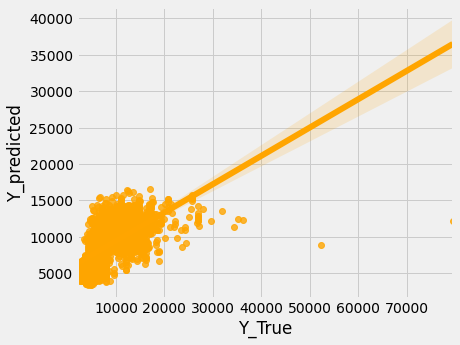

In [80]:
model_predict(LinearRegression())

### L1 Regularization Lasso

------------ Lasso() --------------
 R2 Score              :  0.3974257514570614
Cross Validation Score :  0.37108640947873345
Root Mean Squared Error : 3568.837021376783
Absolute Mean Square   : 2560.625971086623


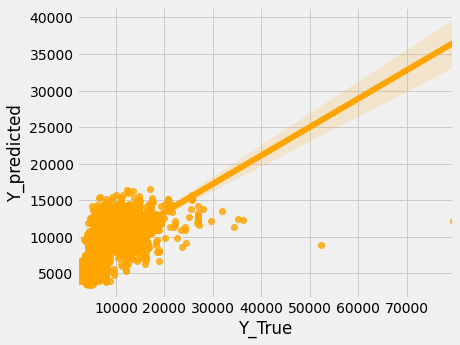

In [81]:
model_predict(Lasso())

### L2 Regularilization Ridge

------------ Ridge() --------------
 R2 Score              :  0.3974436162360492
Cross Validation Score :  0.3710686709904537
Root Mean Squared Error : 3568.7841175584194
Absolute Mean Square   : 2560.663694706973


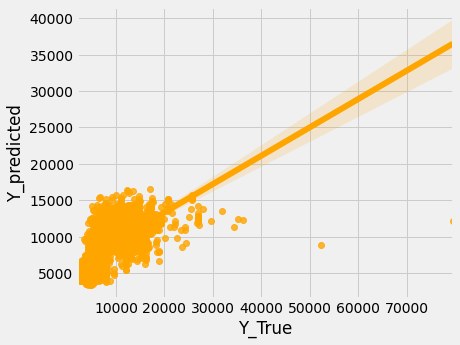

In [82]:
model_predict(Ridge())

### Decision tree Regressor

------------ DecisionTreeRegressor() --------------
 R2 Score              :  0.6862324045131247
Cross Validation Score :  0.6471007147511745
Root Mean Squared Error : 2575.2860556479836
Absolute Mean Square   : 1407.2823596142937


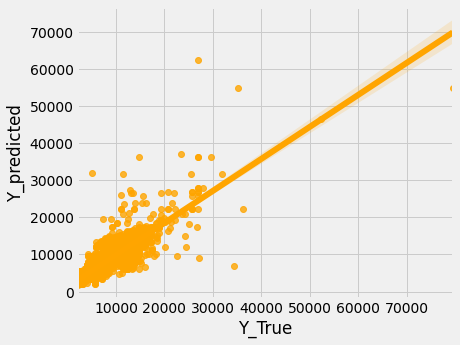

In [84]:
model_predict(DecisionTreeRegressor())

### Random Forest Regressor

------------ RandomForestRegressor() --------------
 R2 Score              :  0.7982761084040289
Cross Validation Score :  0.7636569641165971
Root Mean Squared Error : 2064.9051166621493
Absolute Mean Square   : 1235.5156692787582


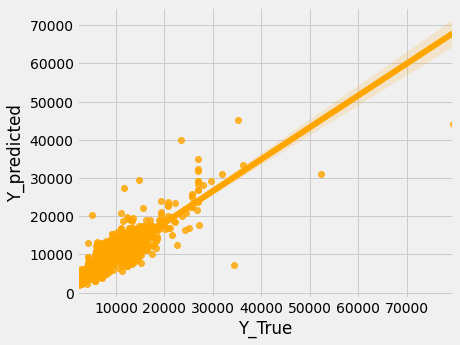

In [85]:
model_predict(RandomForestRegressor())

### ADA BOOST REGRESSOR

------------ AdaBoostRegressor() --------------
 R2 Score              :  0.4929784256610801
Cross Validation Score :  0.46738681098268947
Root Mean Squared Error : 3273.668135784526
Absolute Mean Square   : 2548.3020543071793


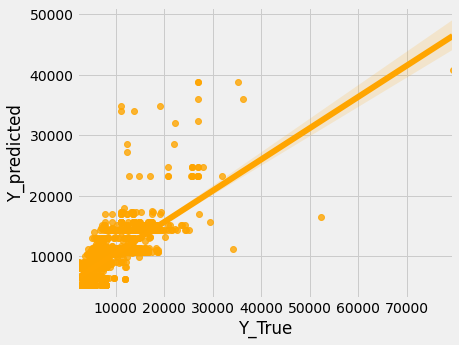

In [86]:
model_predict(AdaBoostRegressor())

### XGBRegressor

------------ XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
             importance_type='gain', interaction_constraints='',
             learning_rate=0.300000012, max_delta_step=0, max_depth=6,
             min_child_weight=1, missing=nan, monotone_constraints='()',
             n_estimators=100, n_jobs=8, num_parallel_tree=1, random_state=0,
             reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1,
             tree_method='exact', validate_parameters=1, verbosity=None) --------------
 R2 Score              :  0.8404222284980483
Cross Validation Score :  0.7965758758267784
Root Mean Squared Error : 1836.570606872496
Absolute Mean Square   : 1178.4769066925828


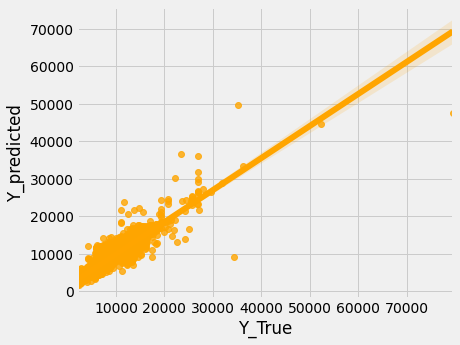

In [87]:
model_predict(XGBRegressor())

### LGBM Regressor

------------ LGBMRegressor() --------------
 R2 Score              :  0.8196428859245715
Cross Validation Score :  0.7933673841419708
Root Mean Squared Error : 1952.4866371141673
Absolute Mean Square   : 1256.9115095781879


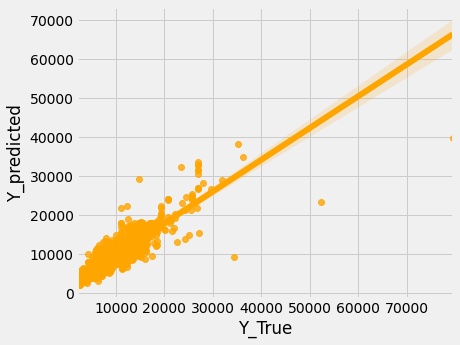

In [88]:
model_predict(LGBMRegressor())

In [89]:
error = []
for i in range(0,8):
    error.append(np.abs(r2_scores[i] - cv_scores[i]))
    

table_dict = {
    'R2 SCORE: ':r2_scores,
    'RMSE': rmse,
    'CV SCORE': cv_scores,
    'Bias/ Error': error
}

score_table = pd.DataFrame(table_dict,index=['LR','L1','l2','DTC','RF','ADA','XGB','LGBM'])

score_table

,R2 SCORE:,RMSE,CV SCORE,Bias/ Error
LR,0.397444,3568.783084,0.371068,0.026376
L1,0.397426,3568.837021,0.371086,0.026339
l2,0.397444,3568.784118,0.371069,0.026375
DTC,0.686232,2575.286056,0.647101,0.039132
RF,0.798276,2064.905117,0.763657,0.034619
ADA,0.492978,3273.668136,0.467387,0.025592
XGB,0.840422,1836.570607,0.796576,0.043846
LGBM,0.819643,1952.486637,0.793367,0.026276


#### OBSERVATIONS
    - LINEAR REGRESSION, Lasso, Ridge are underfitting the model due to presence of multicollinearity.
    - AS most of the Features are Categorical, no linear relationship can be formed and ensembling techniques would not underfit with such kind of problem.
    - AS we can see, Rf, XGB, LGMB are not underfitting the model giving more than 80 % r2_scores and biass term is also very low for all ensembling techniques,
    
    - SVR is underfitting the model the most.


##### HYPER PARAMETER TUNING OF ENSEMBLING TECHNIQUES

In [90]:
params_lgbr = {
    'num_leaves': [70,80,50,40,20],
    'max_depth': [5,7,10,12,15],
    'bagging_freq': [5,10,15,7,12], 
    "bagging_fraction": [0.75,.6,.5,.8,.85,.7],
    'learning_rate': [.01,.02,.1,.5]
}
LightGBR = LGBMRegressor()

grid_l= RandomizedSearchCV(LightGBR,params_lgbr,cv=5,scoring='r2',n_iter=100,verbose=2)


In [92]:

grid_l.fit(x1,y1)

Fitting 5 folds for each of 100 candidates, totalling 500 fits
[LightGBM] [Warning] bagging_fraction is set=0.85, subsample=1.0 will be ignored. Current value: bagging_fraction=0.85
[LightGBM] [Warning] bagging_freq is set=10, subsample_freq=0 will be ignored. Current value: bagging_freq=10
[CV] END bagging_fraction=0.85, bagging_freq=10, learning_rate=0.5, max_depth=10, num_leaves=70; total time=   0.3s
[LightGBM] [Warning] bagging_fraction is set=0.85, subsample=1.0 will be ignored. Current value: bagging_fraction=0.85
[LightGBM] [Warning] bagging_freq is set=10, subsample_freq=0 will be ignored. Current value: bagging_freq=10
[CV] END bagging_fraction=0.85, bagging_freq=10, learning_rate=0.5, max_depth=10, num_leaves=70; total time=   0.2s
[LightGBM] [Warning] bagging_fraction is set=0.85, subsample=1.0 will be ignored. Current value: bagging_fraction=0.85
[LightGBM] [Warning] bagging_freq is set=10, subsample_freq=0 will be ignored. Current value: bagging_freq=10
[CV] END bagging_f

RandomizedSearchCV(cv=5, estimator=LGBMRegressor(), n_iter=100,
                   param_distributions={'bagging_fraction': [0.75, 0.6, 0.5,
                                                             0.8, 0.85, 0.7],
                                        'bagging_freq': [5, 10, 15, 7, 12],
                                        'learning_rate': [0.01, 0.02, 0.1, 0.5],
                                        'max_depth': [5, 7, 10, 12, 15],
                                        'num_leaves': [70, 80, 50, 40, 20]},
                   scoring='r2', verbose=2)

In [93]:
grid_l.best_estimator_,grid_l.best_score_

(LGBMRegressor(bagging_fraction=0.85, bagging_freq=12, max_depth=10,
               num_leaves=80),
 0.8245796837415063)

[LightGBM] [Warning] bagging_fraction is set=0.85, subsample=1.0 will be ignored. Current value: bagging_fraction=0.85
[LightGBM] [Warning] bagging_freq is set=12, subsample_freq=0 will be ignored. Current value: bagging_freq=12
[LightGBM] [Warning] bagging_fraction is set=0.85, subsample=1.0 will be ignored. Current value: bagging_fraction=0.85
[LightGBM] [Warning] bagging_freq is set=12, subsample_freq=0 will be ignored. Current value: bagging_freq=12
[LightGBM] [Warning] bagging_fraction is set=0.85, subsample=1.0 will be ignored. Current value: bagging_fraction=0.85
[LightGBM] [Warning] bagging_freq is set=12, subsample_freq=0 will be ignored. Current value: bagging_freq=12
[LightGBM] [Warning] bagging_fraction is set=0.85, subsample=1.0 will be ignored. Current value: bagging_fraction=0.85
[LightGBM] [Warning] bagging_freq is set=12, subsample_freq=0 will be ignored. Current value: bagging_freq=12
[LightGBM] [Warning] bagging_fraction is set=0.85, subsample=1.0 will be ignored. Cu

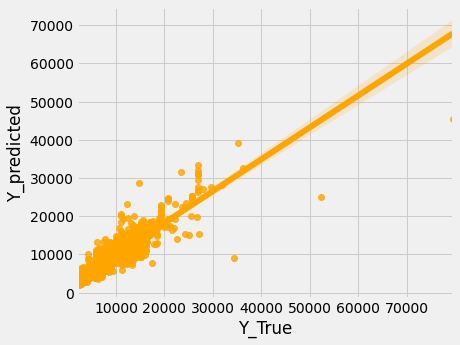

In [94]:
model_predict(LGBMRegressor(bagging_fraction=0.85, bagging_freq=12,
               max_depth=10, num_leaves=80))

In [95]:
params_xgb = {
    'gamma': [0,0.1,0.01,1,2,1.5],
    'max_depth': [5,7,8,10,12,15],
    'min_child_weight': [0,0.5,1,.8,2,5,10], 
     'subsample': [0.75,.6,.5,.8,.85,.7],
    'max_leaves': [0,10,20,40,50]
}
xgb = XGBRegressor()

grid_x= RandomizedSearchCV(xgb,params_xgb,cv=5,scoring='r2',n_iter=20,verbose=2)


In [96]:
grid_x.fit(x_train,y_train)

Fitting 5 folds for each of 20 candidates, totalling 100 fits
[CV] END gamma=1.5, max_depth=7, max_leaves=10, min_child_weight=2, subsample=0.85; total time=   0.6s
[CV] END gamma=1.5, max_depth=7, max_leaves=10, min_child_weight=2, subsample=0.85; total time=   0.5s
[CV] END gamma=1.5, max_depth=7, max_leaves=10, min_child_weight=2, subsample=0.85; total time=   0.6s
[CV] END gamma=1.5, max_depth=7, max_leaves=10, min_child_weight=2, subsample=0.85; total time=   0.8s
[CV] END gamma=1.5, max_depth=7, max_leaves=10, min_child_weight=2, subsample=0.85; total time=   0.6s
[CV] END gamma=0.1, max_depth=15, max_leaves=40, min_child_weight=2, subsample=0.85; total time=   3.4s
[CV] END gamma=0.1, max_depth=15, max_leaves=40, min_child_weight=2, subsample=0.85; total time=   3.5s
[CV] END gamma=0.1, max_depth=15, max_leaves=40, min_child_weight=2, subsample=0.85; total time=   3.4s
[CV] END gamma=0.1, max_depth=15, max_leaves=40, min_child_weight=2, subsample=0.85; total time=   3.4s
[CV] EN

RandomizedSearchCV(cv=5,
                   estimator=XGBRegressor(base_score=None, booster=None,
                                          colsample_bylevel=None,
                                          colsample_bynode=None,
                                          colsample_bytree=None, gamma=None,
                                          gpu_id=None, importance_type='gain',
                                          interaction_constraints=None,
                                          learning_rate=None,
                                          max_delta_step=None, max_depth=None,
                                          min_child_weight=None, missing=nan,
                                          monotone_constraints=None,
                                          n_estimators=100, n...
                                          random_state=None, reg_alpha=None,
                                          reg_lambda=None,
                                          scale_pos_we

In [97]:
grid_x.best_estimator_,grid_x.best_score_

(XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0.1, gpu_id=-1,
              importance_type='gain', interaction_constraints='',
              learning_rate=0.300000012, max_delta_step=0, max_depth=5,
              max_leaves=50, min_child_weight=1, missing=nan,
              monotone_constraints='()', n_estimators=100, n_jobs=8,
              num_parallel_tree=1, random_state=0, reg_alpha=0, reg_lambda=1,
              scale_pos_weight=1, subsample=0.75, tree_method='exact',
              validate_parameters=1, verbosity=None),
 0.787338310480244)

------------ XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=1, gamma=0.1, gpu_id=-1,
             importance_type='gain', interaction_constraints='',
             learning_rate=0.300000012, max_delta_step=0, max_depth=5,
             max_leaves=50, min_child_weight=1, missing=nan,
             monotone_constraints='()', n_estimators=100, n_jobs=8,
             num_parallel_tree=1, random_state=0, reg_alpha=0, reg_lambda=1,
             scale_pos_weight=1, subsample=0.75, tree_method='exact',
             validate_parameters=1, verbosity=None) --------------
 R2 Score              :  0.8402503653650577
Cross Validation Score :  0.8033975939084825
Root Mean Squared Error : 1837.5593217684652
Absolute Mean Square   : 1219.8924027398034


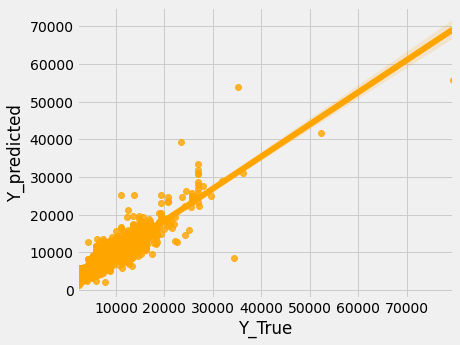

In [98]:
model_predict(
   XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0.1, gpu_id=-1,
              importance_type='gain', interaction_constraints='',
              learning_rate=0.300000012, max_delta_step=0, max_depth=5,
              max_leaves=50, min_child_weight=1, missing=np.nan,
              monotone_constraints='()', n_estimators=100, n_jobs=8,
              num_parallel_tree=1, random_state=0, reg_alpha=0, reg_lambda=1,
              scale_pos_weight=1, subsample=0.75, tree_method='exact',
              validate_parameters=1, verbosity=None))

##### OBSERVATIONS:
    - XGB IS performing better than Light GBM as XGB Model has low RMSE Value than Light GBM. R2 scores are approximately saem

#### FINAL MODEL FOR EVALUATION

## XGBOOST REGRESSOR

In [102]:
    model = XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0.1, gpu_id=-1,
              importance_type='gain', interaction_constraints='',
              learning_rate=0.300000012, max_delta_step=0, max_depth=5,
              max_leaves=50, min_child_weight=1, missing=np.nan,
              monotone_constraints='()', n_estimators=100, n_jobs=8,
              num_parallel_tree=1, random_state=0, reg_alpha=0, reg_lambda=1,
              scale_pos_weight=1, subsample=0.75, tree_method='exact',
              validate_parameters=1, verbosity=None)
    
    model.fit(x_train,y_train)
    predictions = model.predict(x_test)
    cv_score = np.mean(cross_val_score(model,x_train,y_train,cv=10,scoring='r2'))
     
    print('\n\n*******************XGBOOST REGRESSOR**********************\n\n')
    print(' \nR2 Score              : ', r2_score(y_test,predictions))
    print('\nCross Validation Score : ',cv_score)
    print('\nRoot Mean Squared Error :',np.sqrt(mean_squared_error(y_test,predictions)))
    print('\nAbsolute Mean Square   :', mean_absolute_error(y_test,predictions))
    
    
  



*******************XGBOOST REGRESSOR**********************


 
R2 Score              :  0.8402503653650577

Cross Validation Score :  0.8033975939084825

Root Mean Squared Error : 1837.5593217684652

Absolute Mean Square   : 1219.8924027398034


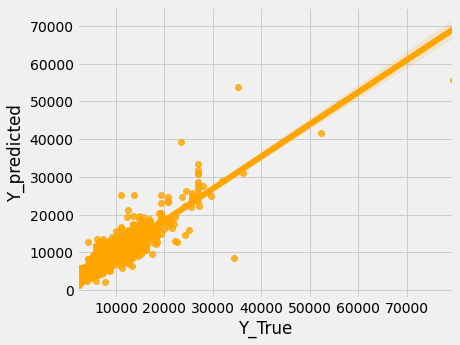

In [103]:

    
    plt.figure(figsize=(6,5))
    
    sb.regplot(y_test,predictions,color='orange',)
    plt.xlabel('Y_True')
    plt.ylabel('Y_predicted')
    plt.show()    

<AxesSubplot:xlabel='Price', ylabel='Density'>

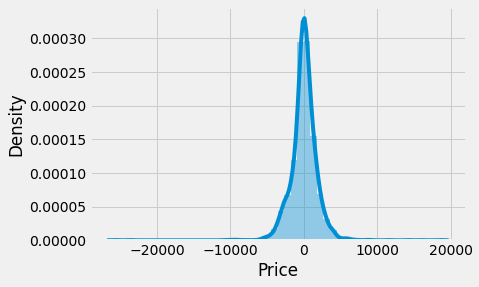

In [104]:
sb.distplot(predictions-y_test)

### CONCLUSION:
    - AS the Regression Model Eror i.e Difference between expected and actual value  follows a gassian structure / normal distribution, model is not underfitting or overfitting and model is working fine.
    
    - XGBoost regressor give r2 score of .83 % which is a nice evaluation score for a model. with least rmse error of 1825

### PREDICTING TEST DATA

In [105]:
features_test = StandardScaler().fit_transform(data_test)

scaled_test  = pd.DataFrame(features_test, columns=data_test.columns)

In [106]:
predict_test_data = model.predict(scaled_test)

In [107]:
predict_test_data

array([ 6673.7344, 10135.19  ,  5672.907 , ...,  6673.7344,  6673.7344,
       11457.335 ], dtype=float32)

In [108]:
test_prediction_FL = pd.DataFrame(predict_test_data,columns=['Price'])

In [109]:
test_prediction_FL

,Price
0,6673.734375
1,10135.190430
2,5672.907227
3,11457.334961
4,6560.532227
...,...
2666,5173.536133
2667,9631.105469
2668,6673.734375
2669,6673.734375


#### SAVING THE MODEL

In [110]:
import joblib 

In [111]:
joblib.dump(model,'FL_XGB.pk')

['FL_XGB.pk']

In [112]:
joblib.load('FL_XGB.pk')

XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=1, gamma=0.1, gpu_id=-1,
             importance_type='gain', interaction_constraints='',
             learning_rate=0.300000012, max_delta_step=0, max_depth=5,
             max_leaves=50, min_child_weight=1, missing=nan,
             monotone_constraints='()', n_estimators=100, n_jobs=8,
             num_parallel_tree=1, random_state=0, reg_alpha=0, reg_lambda=1,
             scale_pos_weight=1, subsample=0.75, tree_method='exact',
             validate_parameters=1, verbosity=None)

In [113]:
### Saving prediction of test data to pc in csv file

test_prediction_FL.to_csv('FL_TEST_DATA')